In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set_theme()
pd.options.display.float_format = '{:,.2f}'.format

- Bảng POS_CASH_BALANCE này thể hiện thông tin giao dịch: các lịch sử giao dịch và hành vi mua sắm qua thẻ tín dụng của người tiêu dùng tại Home Credit.


- SK_ID_PREV: 1 khách hàng có thể có 0,1 hoặc nhiều hơn 1 khoản nợ
- MONTHS_BALANCE: tính bằng tháng kể từ khoản vay gần nhất trước đấy
- CNT_INSTALMENT: Thời hạn của tín dụng trước
- CNT_INSTALMENT_FUTURE: phần trả góp còn thiếu từ những khoản nợ trước
- NAME_CONTRACT_STATUS: tình trạng hợp đồng
- SK_DPD: số ngày quá hạn trong kì của khoản tín dụng trước đó
- SK_DPD_DEF: số ngày quá hạn trong kì trước của tín dụng nhưng được công ti chấp nhận


In [2]:
def create_feature(df):
    new_features = {
        'CNT_INSTALMENT_DIFF': df['CNT_INSTALMENT'] - df['CNT_INSTALMENT_FUTURE'],
        'DPD': df['SK_DPD'] - df['SK_DPD_DEF'],
        'DPD_FLAG': df['SK_DPD'] > 0,
        'DPD_DEF_FLAG': df['SK_DPD_DEF'] > 0,
        'OVERDUE_RATIO': df['SK_DPD'] / df['CNT_INSTALMENT'],
        'OVERDUE_DEF_RATIO': df['SK_DPD_DEF'] / df['CNT_INSTALMENT'],
    }

    df = pd.concat([df, pd.DataFrame(new_features)], axis=1)
    return df

In [3]:
POS_Cash_df = pd.read_csv('../raw-data/dseb63_POS_CASH_balance.csv')

In [4]:
POS_Cash_df = create_feature(POS_Cash_df)
print('After creating features: {}'.format(POS_Cash_df.shape))

After creating features: (8543375, 14)


In [5]:
POS_Cash_df.head()

,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR,CNT_INSTALMENT_DIFF,DPD,DPD_FLAG,DPD_DEF_FLAG,OVERDUE_RATIO,OVERDUE_DEF_RATIO
0,1803195,-31,48.00,45.00,Active,0,0,185279,3.00,0,False,False,0.00,0.00
1,1803195,-17,48.00,31.00,Active,0,0,185279,17.00,0,False,False,0.00,0.00
2,1803195,-21,48.00,35.00,Active,0,0,185279,13.00,0,False,False,0.00,0.00
3,1803195,-8,48.00,21.00,Active,0,0,185279,27.00,0,False,False,0.00,0.00
4,1803195,-4,48.00,17.00,Active,0,0,185279,31.00,0,False,False,0.00,0.00


In [6]:
POS_Cash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8543375 entries, 0 to 8543374
Data columns (total 14 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   MONTHS_BALANCE         int64  
 2   CNT_INSTALMENT         float64
 3   CNT_INSTALMENT_FUTURE  float64
 4   NAME_CONTRACT_STATUS   object 
 5   SK_DPD                 int64  
 6   SK_DPD_DEF             int64  
 7   SK_ID_CURR             int64  
 8   CNT_INSTALMENT_DIFF    float64
 9   DPD                    int64  
 10  DPD_FLAG               bool   
 11  DPD_DEF_FLAG           bool   
 12  OVERDUE_RATIO          float64
 13  OVERDUE_DEF_RATIO      float64
dtypes: bool(2), float64(5), int64(6), object(1)
memory usage: 798.5+ MB


In [7]:
POS_Cash_df.duplicated().sum()

0

In [8]:
POS_Cash_df.isnull().sum()

SK_ID_PREV                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           21863
CNT_INSTALMENT_FUTURE    21878
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
SK_ID_CURR                   0
CNT_INSTALMENT_DIFF      21963
DPD                          0
DPD_FLAG                     0
DPD_DEF_FLAG                 0
OVERDUE_RATIO            21863
OVERDUE_DEF_RATIO        21863
dtype: int64

In [9]:
POS_Cash_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,"8,543,375.00","1,903,488.60","535,938.73","1,000,001.00","1,434,475.00","1,896,878.00","2,369,096.00","2,843,499.00"
MONTHS_BALANCE,"8,543,375.00",-34.95,26.05,-96.00,-54.00,-28.00,-13.00,-1.00
CNT_INSTALMENT,"8,521,512.00",17.03,12.00,1.00,10.00,12.00,24.00,84.00
CNT_INSTALMENT_FUTURE,"8,521,497.00",10.47,11.14,0.00,3.00,7.00,14.00,84.00
SK_DPD,"8,543,375.00",11.90,134.03,0.00,0.00,0.00,0.00,"4,231.00"
SK_DPD_DEF,"8,543,375.00",0.58,30.42,0.00,0.00,0.00,0.00,"3,373.00"
SK_ID_CURR,"8,543,375.00","153,535.56","88,716.61",0.00,"76,622.00","153,315.00","230,293.00","307,510.00"
CNT_INSTALMENT_DIFF,"8,521,412.00",6.57,5.88,-51.00,2.00,5.00,9.00,72.00
DPD,"8,543,375.00",11.32,130.57,0.00,0.00,0.00,0.00,"4,231.00"
OVERDUE_RATIO,"8,521,512.00",1.58,20.60,0.00,0.00,0.00,0.00,"3,804.00"


In [10]:
num_cols = POS_Cash_df.select_dtypes(include=np.number).columns.tolist()
cat_cols = POS_Cash_df.select_dtypes(exclude=np.number).columns.tolist()

print("Numerical columns: ", num_cols)
print("Categorical columns: ", cat_cols)

Numerical columns:  ['SK_ID_PREV', 'MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF', 'SK_ID_CURR', 'CNT_INSTALMENT_DIFF', 'DPD', 'OVERDUE_RATIO', 'OVERDUE_DEF_RATIO']
Categorical columns:  ['NAME_CONTRACT_STATUS', 'DPD_FLAG', 'DPD_DEF_FLAG']


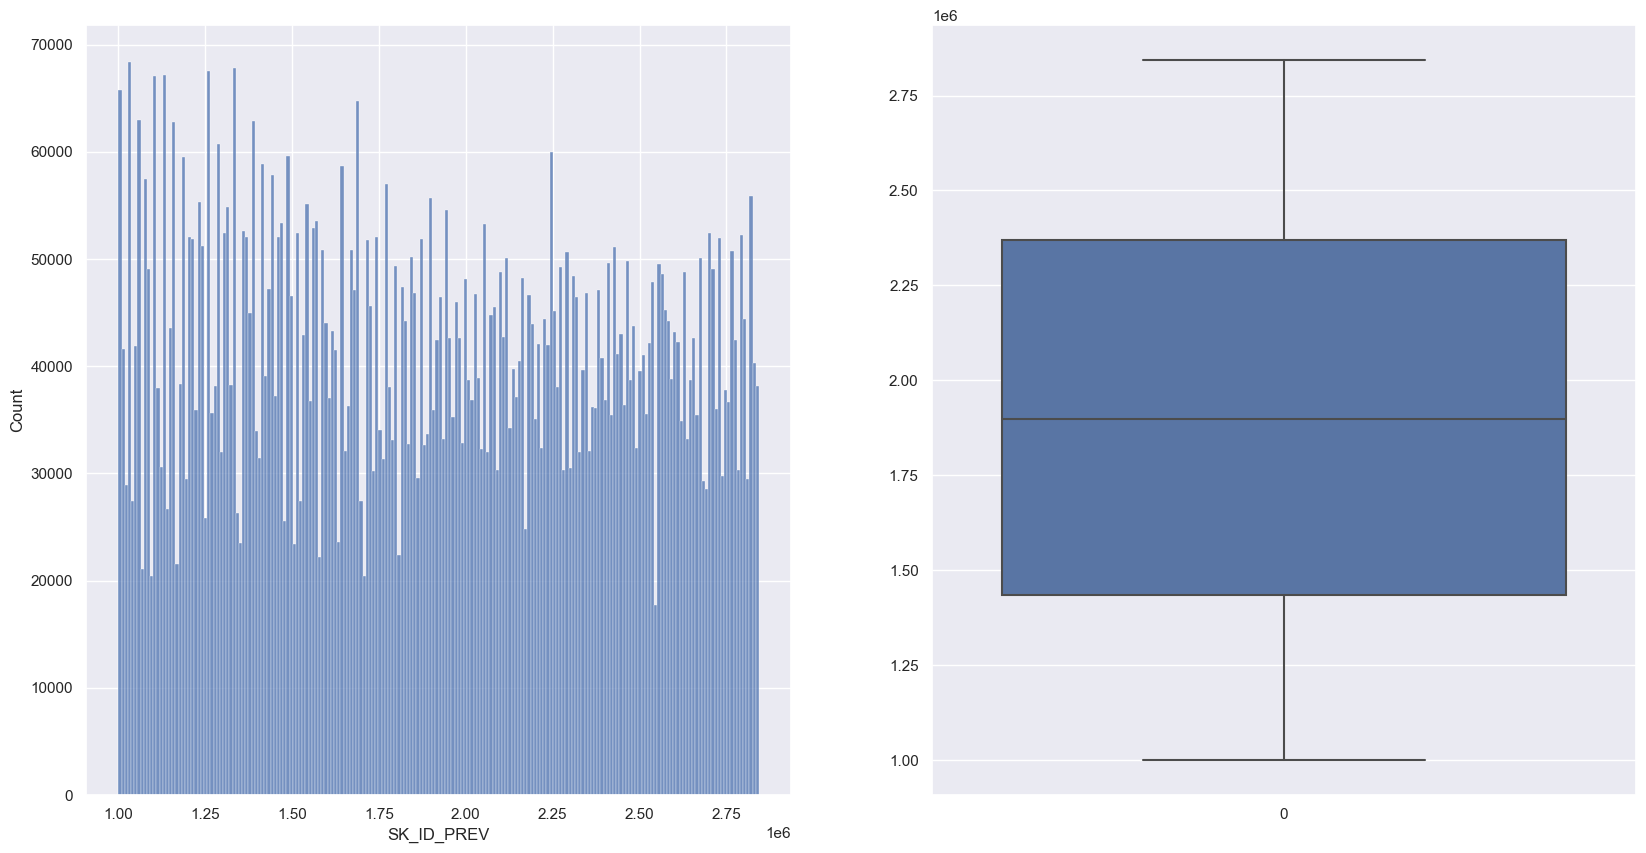

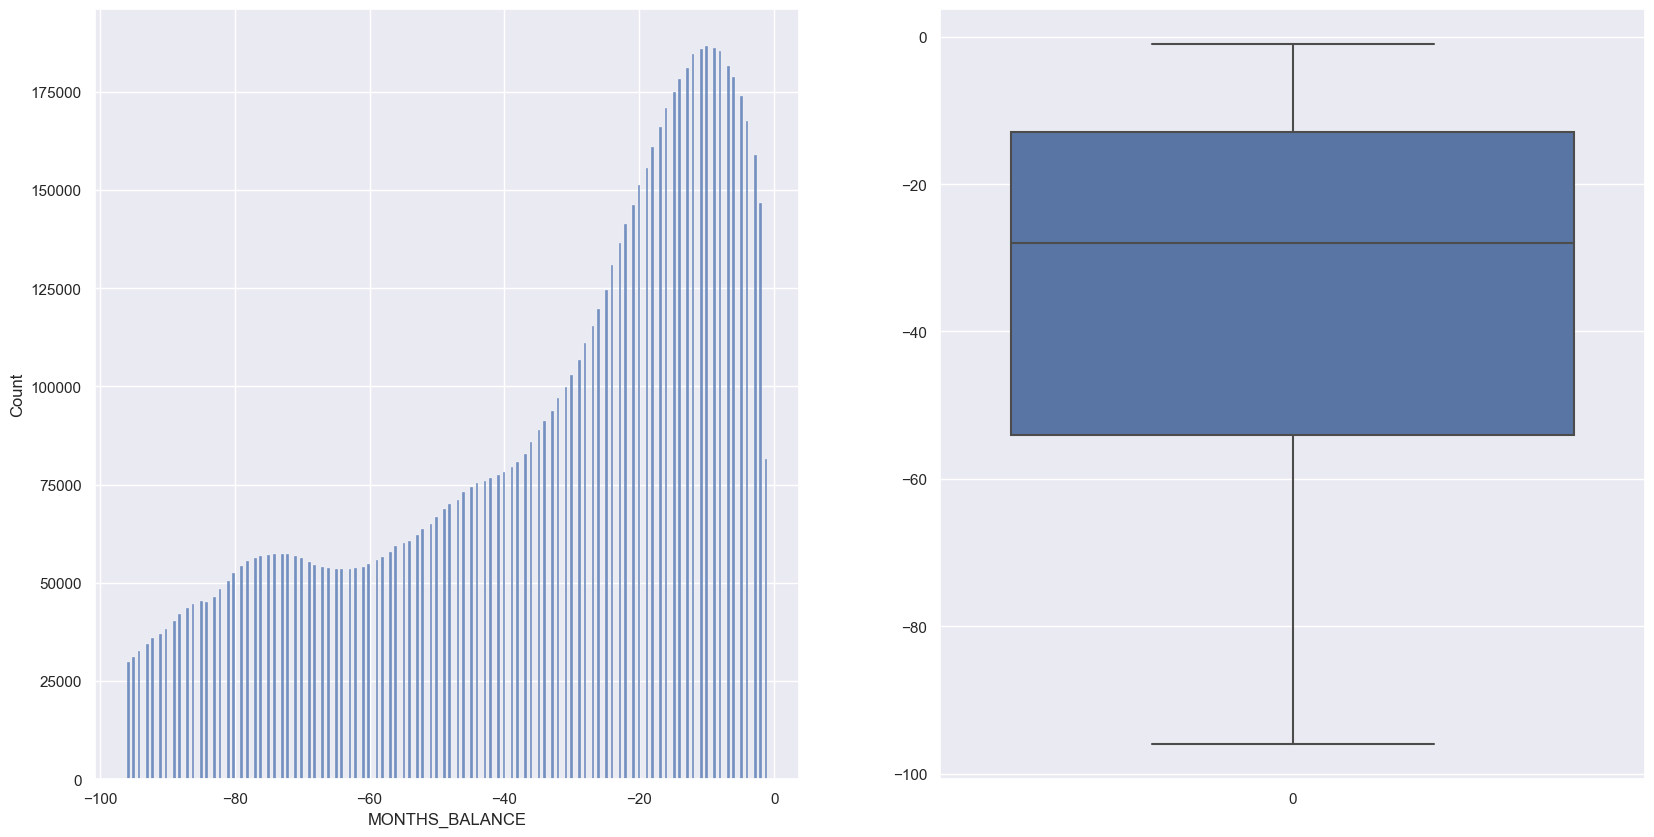

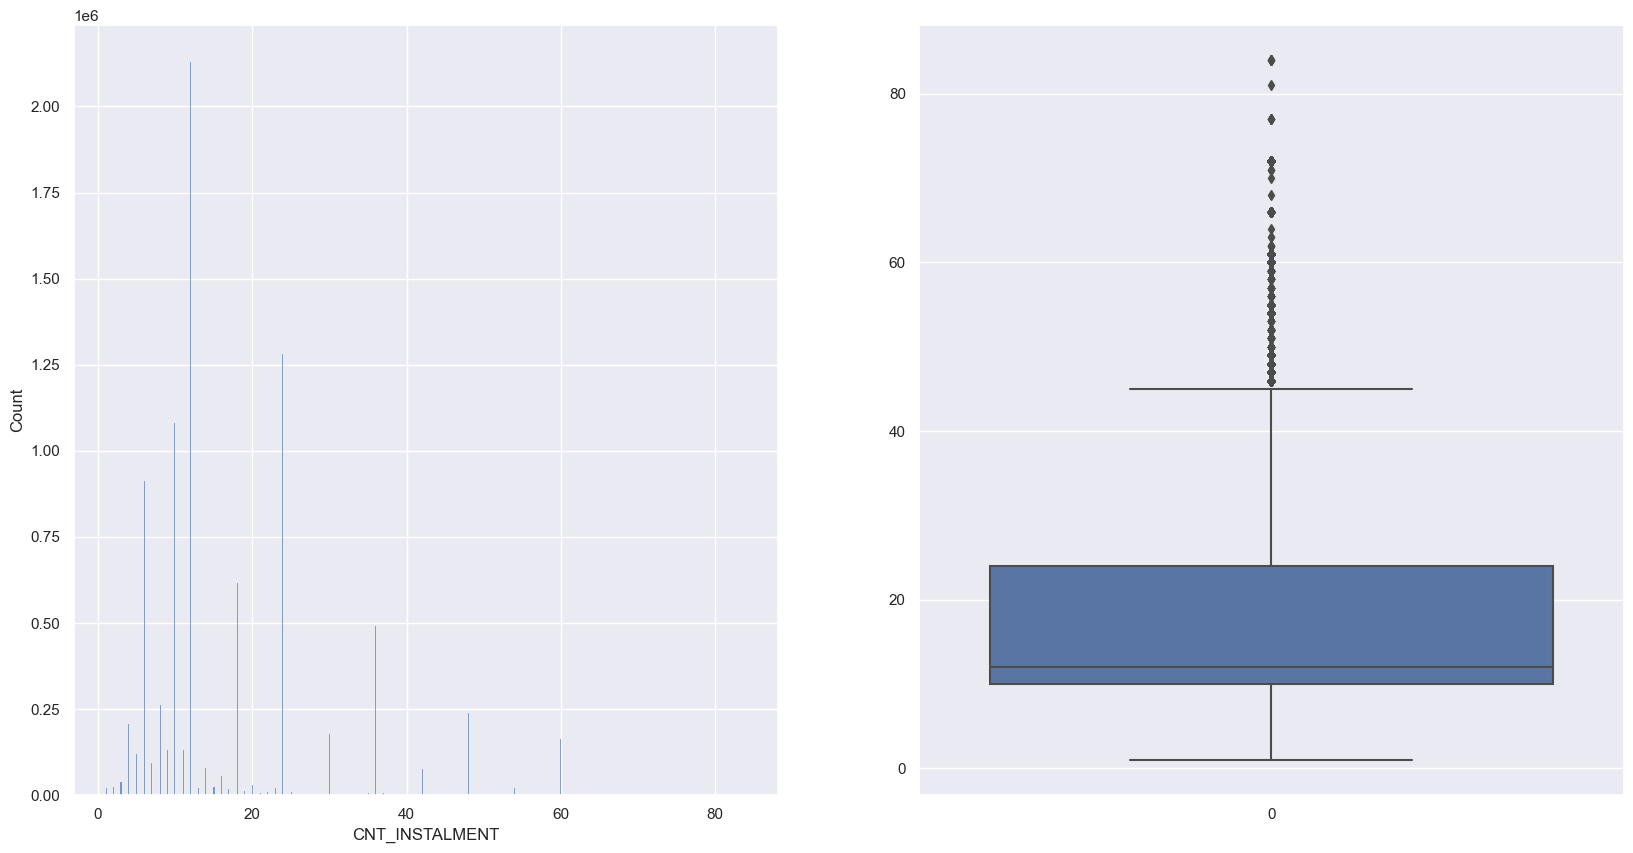

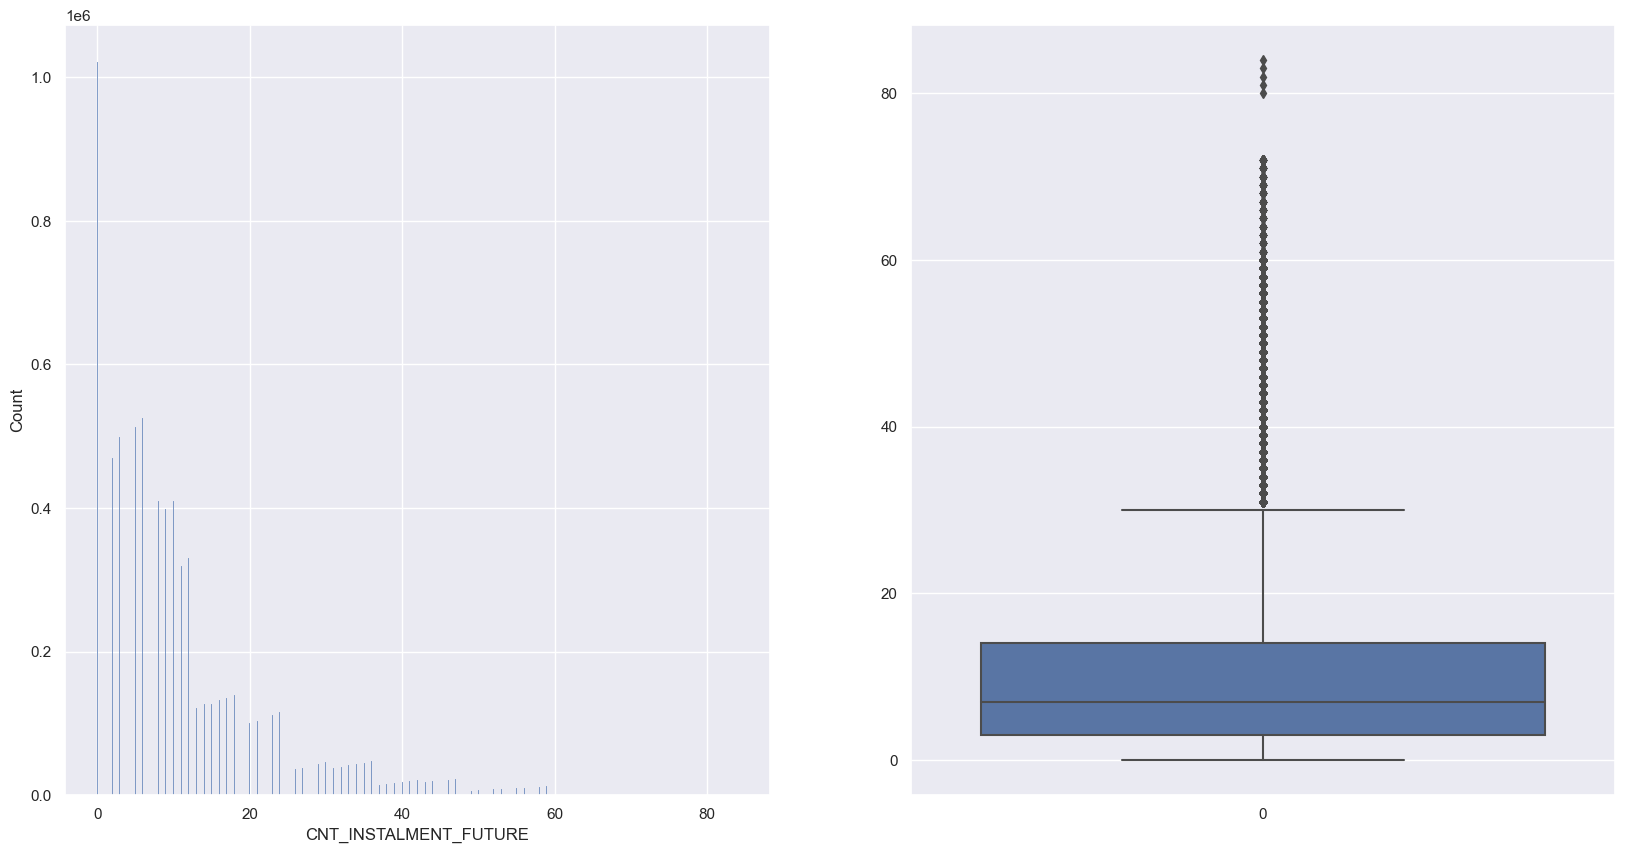

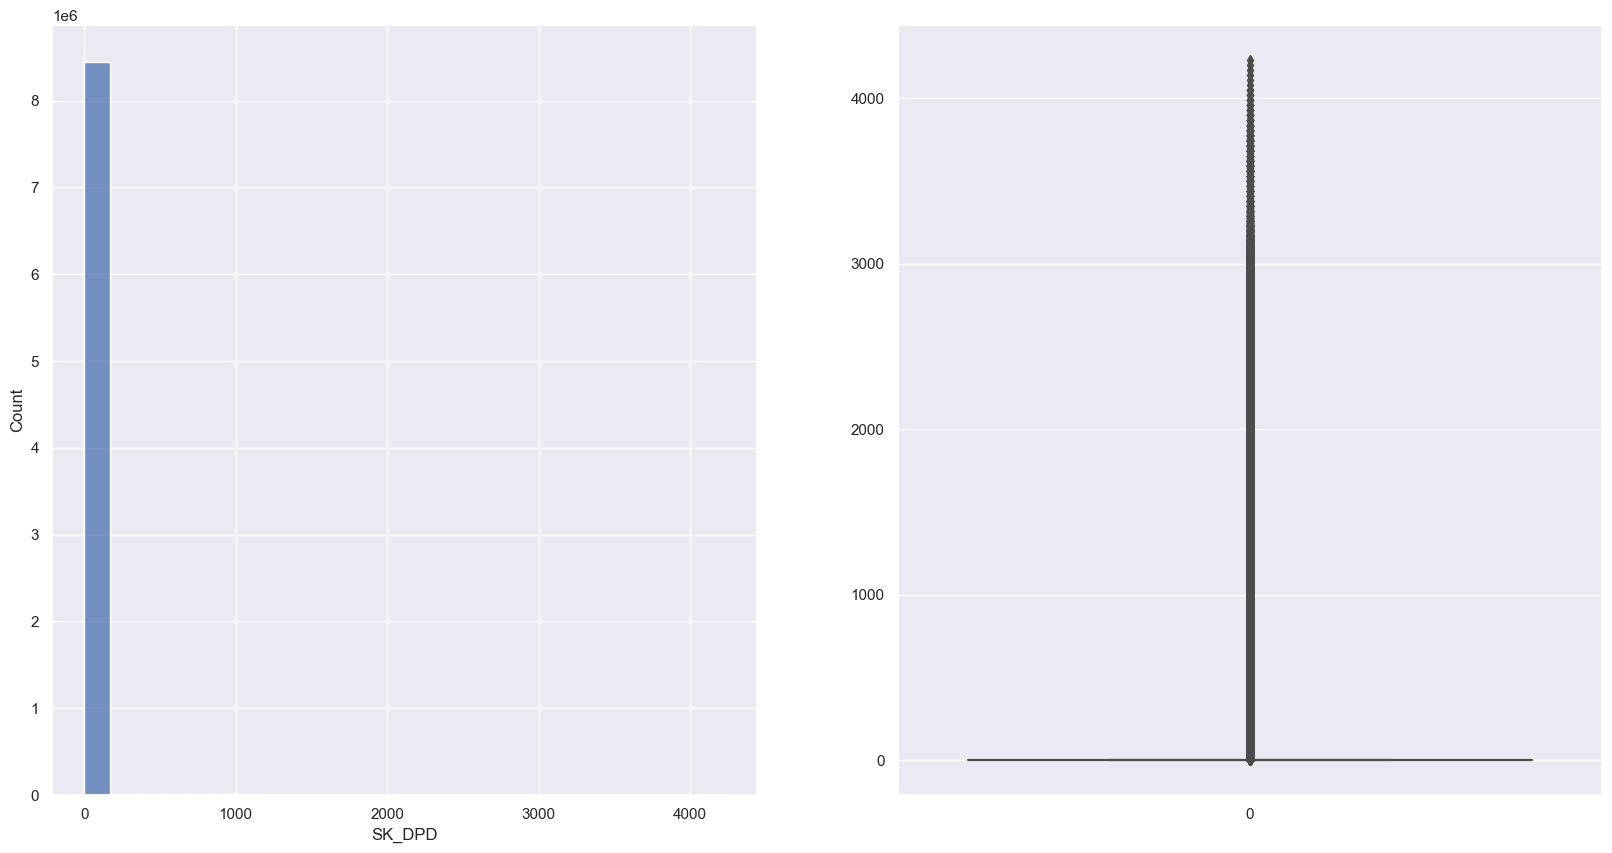

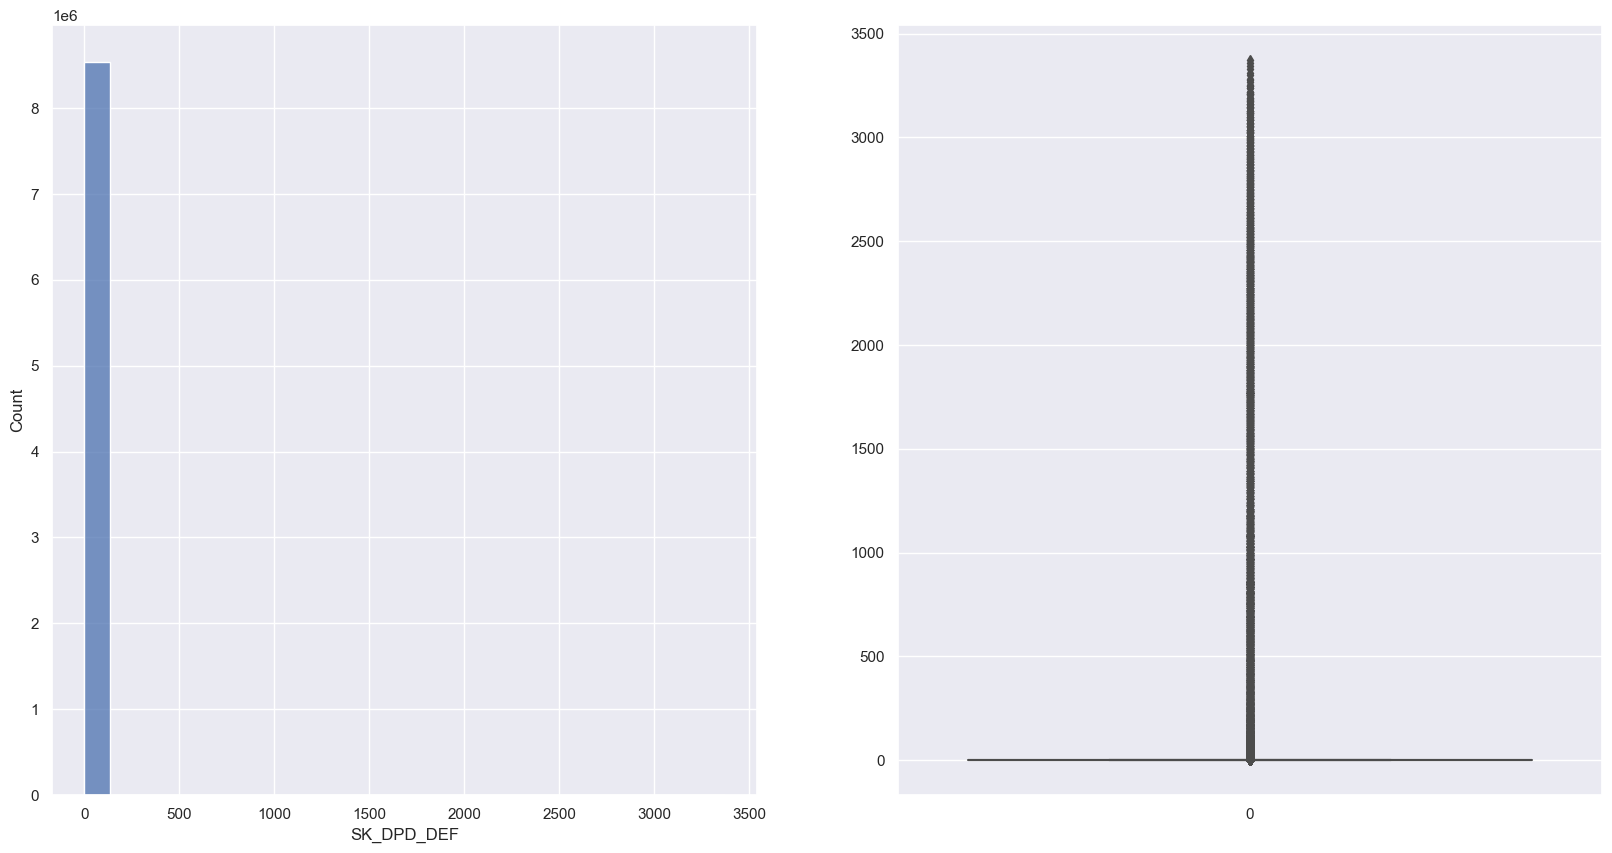

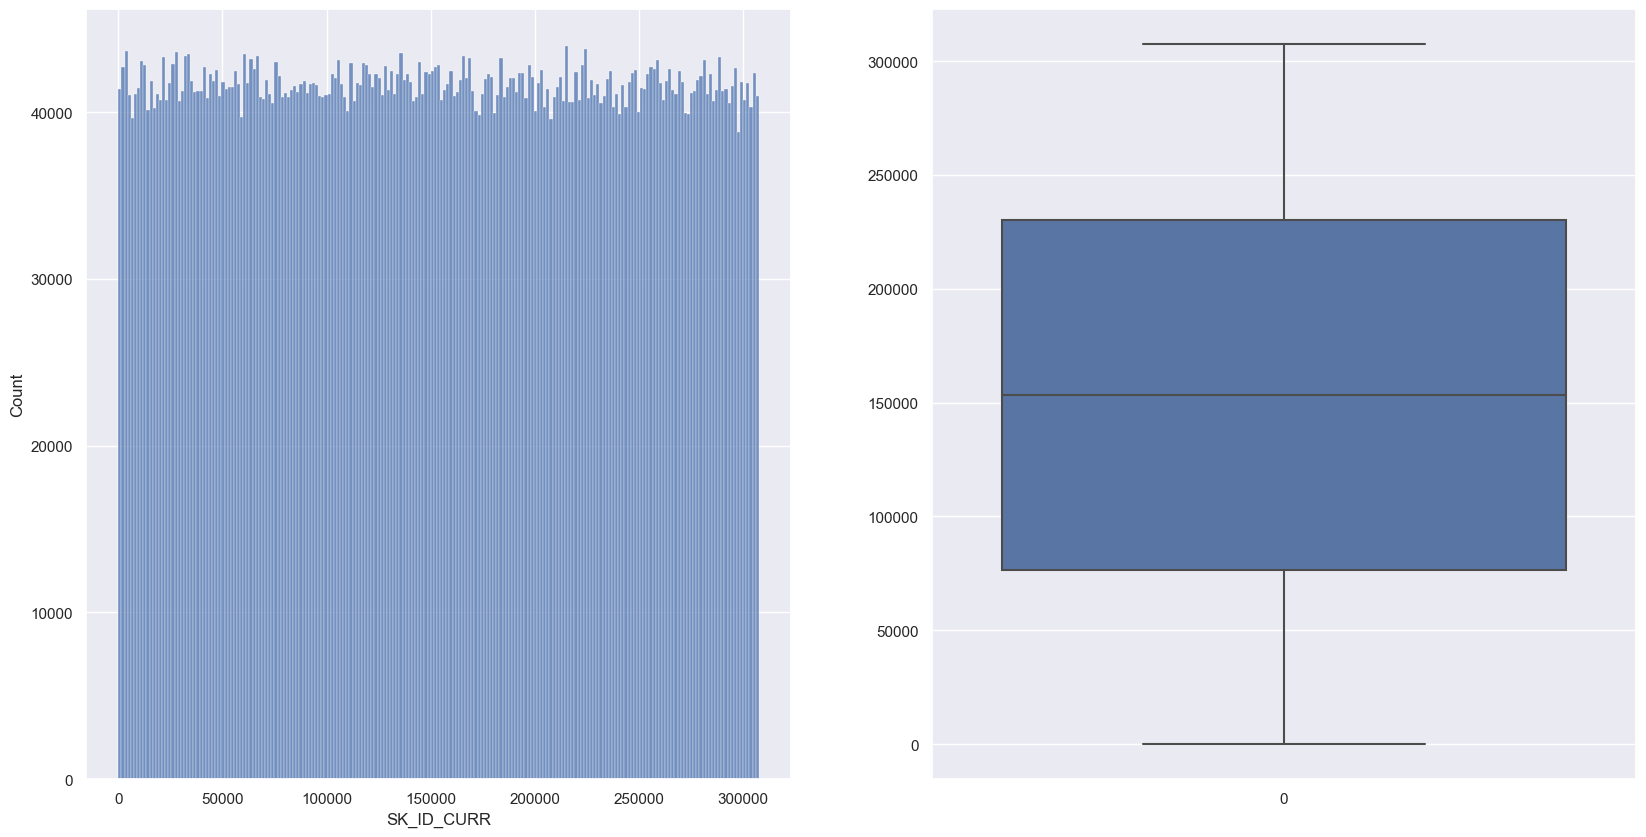

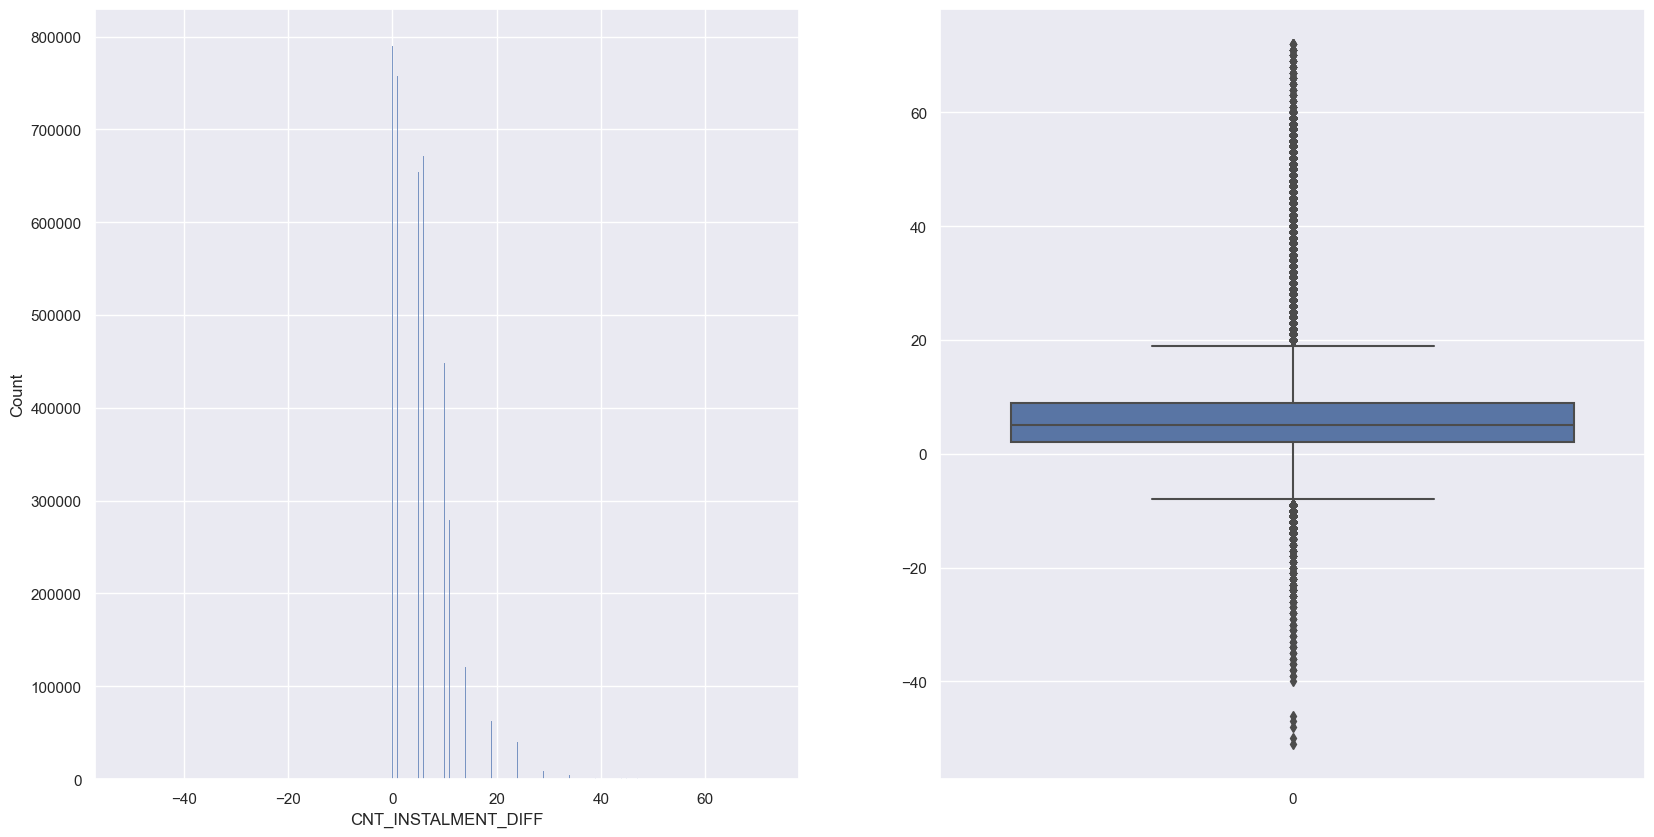

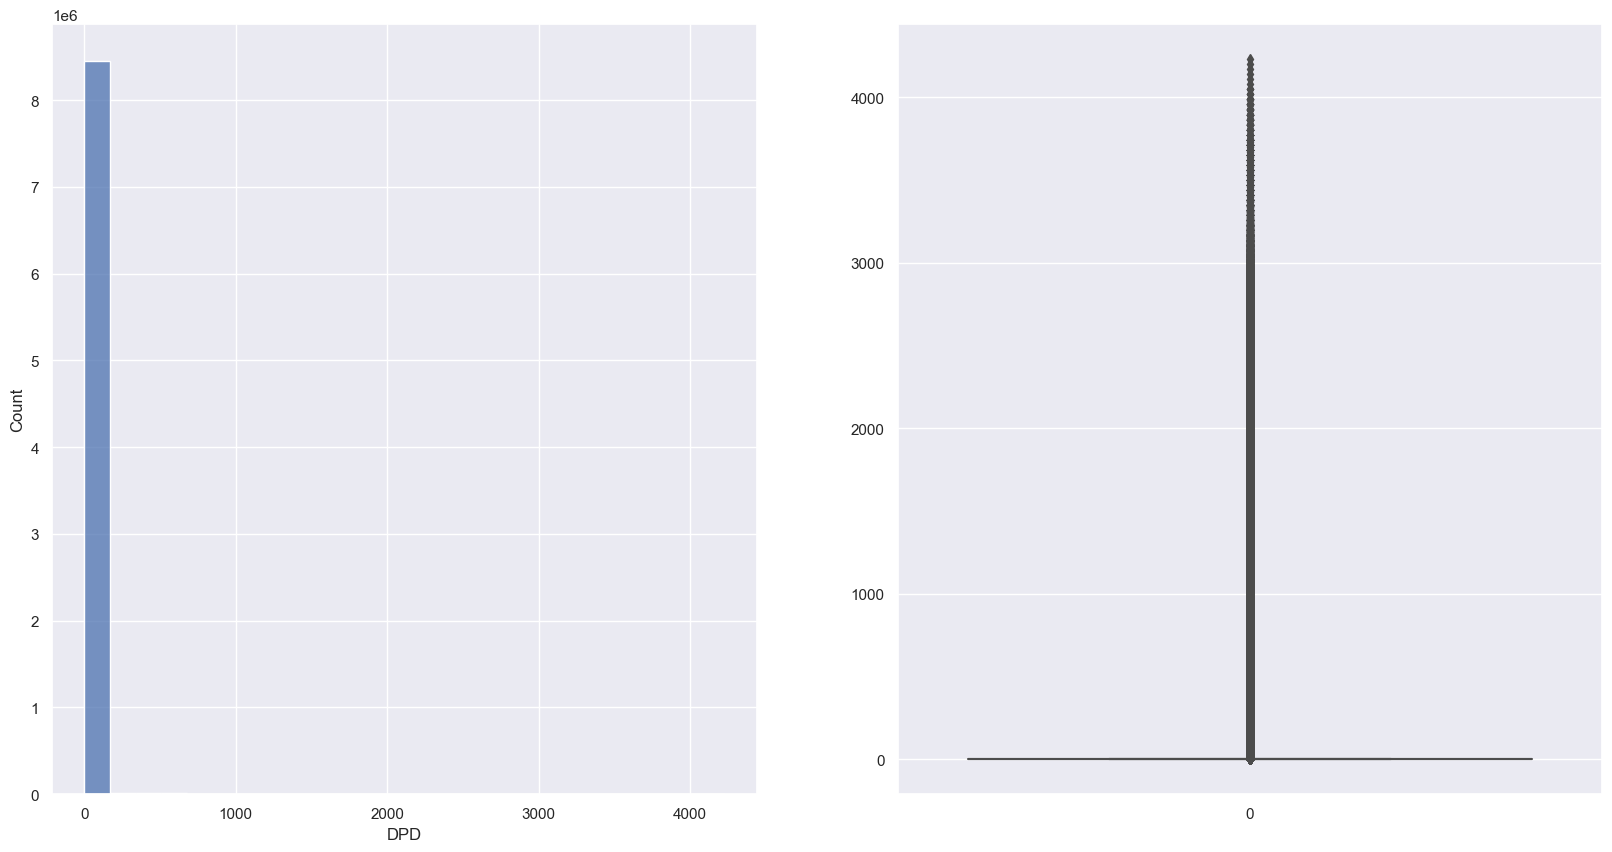

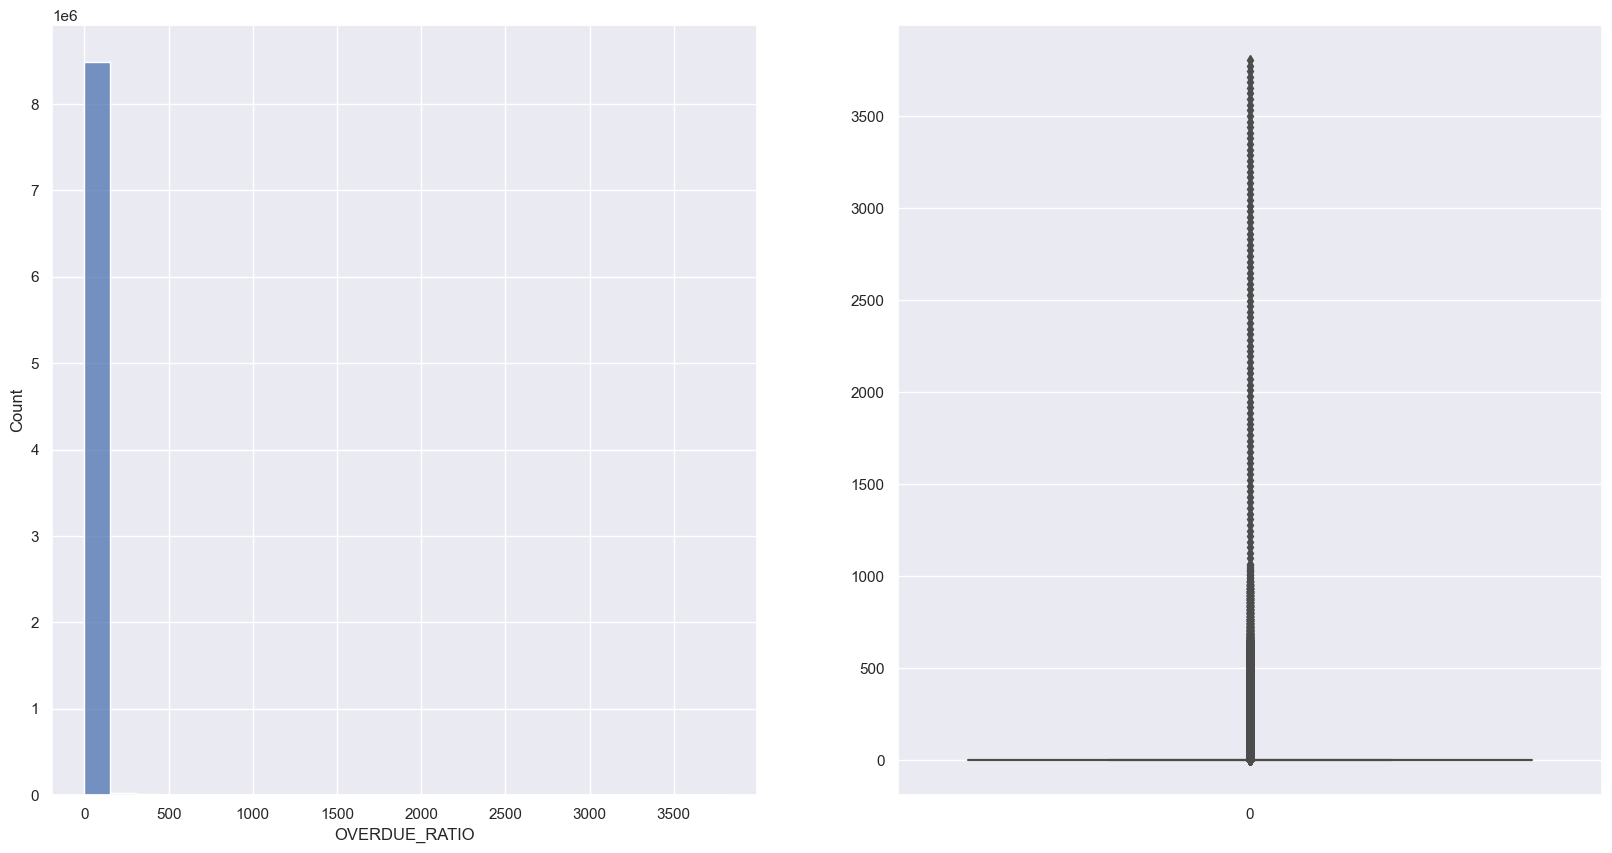

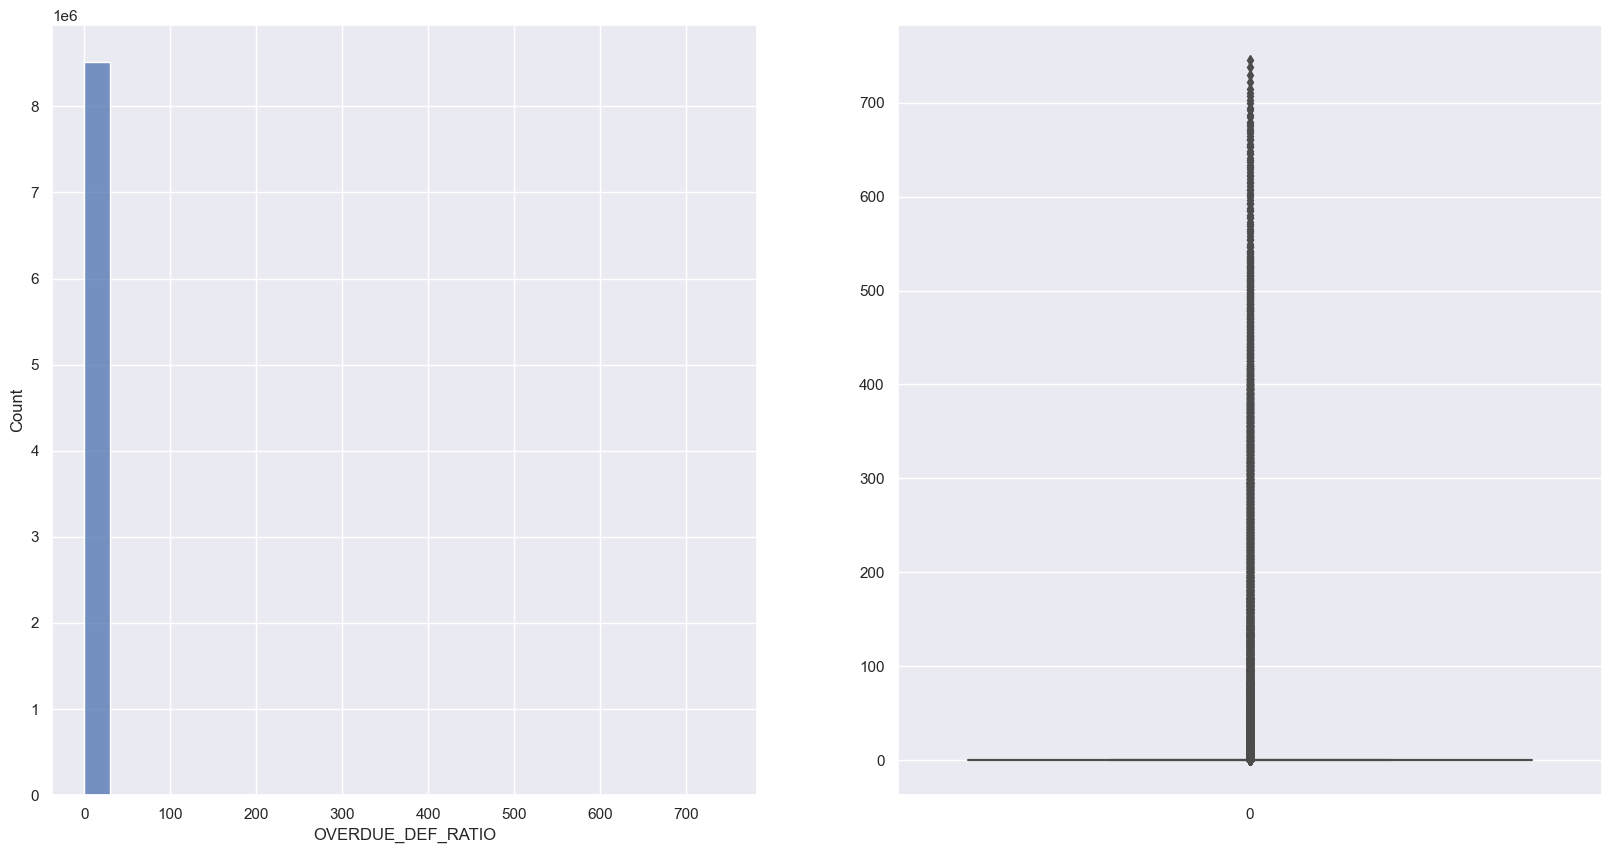

In [11]:
def plot_distribution(df, cols):
    for i in cols:
        plt.figure(figsize=(20,10))
        plt.subplot(1,2,1)
        sns.histplot(df[i])
        plt.subplot(1,2,2)
        sns.boxplot(df[i])
        plt.show()
plot_distribution(POS_Cash_df, num_cols)

In [12]:
## get the most recent record of this dataset
POS_Cash_df_last = POS_Cash_df.sort_values(by=['MONTHS_BALANCE']).groupby(["SK_ID_CURR", "SK_ID_PREV"]).last().reset_index()
POS_Cash_df_last

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,CNT_INSTALMENT_DIFF,DPD,DPD_FLAG,DPD_DEF_FLAG,OVERDUE_RATIO,OVERDUE_DEF_RATIO
0,0,1231213,-1,12.00,12.00,Active,0,0,0.00,0,False,False,0.00,0.00
1,0,1716062,-5,2.00,0.00,Completed,0,0,2.00,0,False,False,0.00,0.00
2,0,1891354,-1,3.00,0.00,Completed,0,0,3.00,0,False,False,0.00,0.00
3,0,2665996,-10,5.00,0.00,Completed,0,0,5.00,0,False,False,0.00,0.00
4,1,1847729,-43,10.00,0.00,Completed,0,0,10.00,0,False,False,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800332,307508,1956312,-1,10.00,2.00,Active,0,0,8.00,0,False,False,0.00,0.00
800333,307508,1978855,-64,12.00,1.00,Active,0,0,11.00,0,False,False,0.00,0.00
800334,307509,1153961,-43,8.00,0.00,Completed,0,0,8.00,0,False,False,0.00,0.00
800335,307509,2384616,-25,6.00,0.00,Completed,0,0,6.00,0,False,False,0.00,0.00


#### Đếm số lần trả góp mới hoàn thành

In [13]:
POS_Cash_df_last["COMPLETED_FLAG"] = POS_Cash_df_last["NAME_CONTRACT_STATUS"] == "Completed" 
POS_Cash_df_last["COMPLETED_COUNT"] = POS_Cash_df_last.groupby(["SK_ID_CURR"])["COMPLETED_FLAG"].transform("sum")
POS_Cash_df_last.drop(["COMPLETED_FLAG"], axis=1, inplace= True)
POS_Cash_df_last

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,CNT_INSTALMENT_DIFF,DPD,DPD_FLAG,DPD_DEF_FLAG,OVERDUE_RATIO,OVERDUE_DEF_RATIO,COMPLETED_COUNT
0,0,1231213,-1,12.00,12.00,Active,0,0,0.00,0,False,False,0.00,0.00,3
1,0,1716062,-5,2.00,0.00,Completed,0,0,2.00,0,False,False,0.00,0.00,3
2,0,1891354,-1,3.00,0.00,Completed,0,0,3.00,0,False,False,0.00,0.00,3
3,0,2665996,-10,5.00,0.00,Completed,0,0,5.00,0,False,False,0.00,0.00,3
4,1,1847729,-43,10.00,0.00,Completed,0,0,10.00,0,False,False,0.00,0.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800332,307508,1956312,-1,10.00,2.00,Active,0,0,8.00,0,False,False,0.00,0.00,2
800333,307508,1978855,-64,12.00,1.00,Active,0,0,11.00,0,False,False,0.00,0.00,2
800334,307509,1153961,-43,8.00,0.00,Completed,0,0,8.00,0,False,False,0.00,0.00,2
800335,307509,2384616,-25,6.00,0.00,Completed,0,0,6.00,0,False,False,0.00,0.00,2


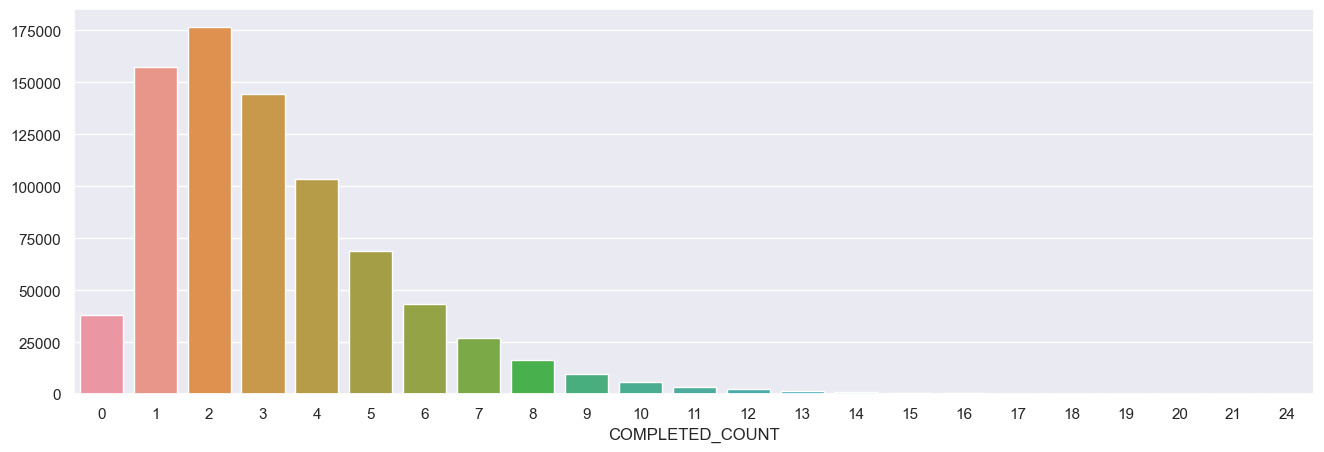

In [14]:
completed_count_SK = POS_Cash_df_last.groupby(["COMPLETED_COUNT"]).size()
plt.figure(figsize=(16,5))
sns.barplot(x=completed_count_SK.index , y=completed_count_SK.values )
plt.show()

#### Đếm số lần trả góp quá hạn bởi ID

In [15]:
def overdue_flag(x):
    if x['SK_DPD_DEF'] > 0 and x['CNT_INSTALMENT_FUTURE'] > 0:
        return 1
    else:
        return 0

POS_Cash_df_last["Overdue_flag"] = POS_Cash_df_last.apply(overdue_flag, axis= 1)


def DPD_flag(x):
    if x['DPD_FLAG'] == True :
        return 1
    else:
        return 0

POS_Cash_df_last["DPD_FLAG"] = POS_Cash_df_last.apply(DPD_flag, axis= 1)


def DPD_DEF_flag(x):
    if x['DPD_DEF_FLAG'] == True :
        return 1
    else:
        return 0

POS_Cash_df_last["DPD_DEF_FLAG"] = POS_Cash_df_last.apply(DPD_DEF_flag, axis= 1)
POS_Cash_df_last

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,CNT_INSTALMENT_DIFF,DPD,DPD_FLAG,DPD_DEF_FLAG,OVERDUE_RATIO,OVERDUE_DEF_RATIO,COMPLETED_COUNT,Overdue_flag
0,0,1231213,-1,12.00,12.00,Active,0,0,0.00,0,0,0,0.00,0.00,3,0
1,0,1716062,-5,2.00,0.00,Completed,0,0,2.00,0,0,0,0.00,0.00,3,0
2,0,1891354,-1,3.00,0.00,Completed,0,0,3.00,0,0,0,0.00,0.00,3,0
3,0,2665996,-10,5.00,0.00,Completed,0,0,5.00,0,0,0,0.00,0.00,3,0
4,1,1847729,-43,10.00,0.00,Completed,0,0,10.00,0,0,0,0.00,0.00,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800332,307508,1956312,-1,10.00,2.00,Active,0,0,8.00,0,0,0,0.00,0.00,2,0
800333,307508,1978855,-64,12.00,1.00,Active,0,0,11.00,0,0,0,0.00,0.00,2,0
800334,307509,1153961,-43,8.00,0.00,Completed,0,0,8.00,0,0,0,0.00,0.00,2,0
800335,307509,2384616,-25,6.00,0.00,Completed,0,0,6.00,0,0,0,0.00,0.00,2,0


In [16]:
#Overdue_Count
POS_Cash_df_last["Overdue_Count"] = POS_Cash_df_last.groupby(["SK_ID_CURR"])["Overdue_flag"].transform("sum")
POS_Cash_df_last.drop(["Overdue_flag"], axis= 1, inplace= True)


# DPD_FLAG_COUNT
POS_Cash_df_last["DPD_FLAG_count"] = POS_Cash_df_last.groupby(["SK_ID_CURR"])["DPD_FLAG"].transform("sum")
POS_Cash_df_last.drop(["DPD_FLAG"], axis= 1, inplace= True)


# DPD_DEF_FLAG_COUNT
POS_Cash_df_last["DPD_DEF_FLAG_count"] = POS_Cash_df_last.groupby(["SK_ID_CURR"])["DPD_DEF_FLAG"].transform("sum")
POS_Cash_df_last.drop(["DPD_DEF_FLAG"], axis= 1, inplace= True)
POS_Cash_df_last


,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,CNT_INSTALMENT_DIFF,DPD,OVERDUE_RATIO,OVERDUE_DEF_RATIO,COMPLETED_COUNT,Overdue_Count,DPD_FLAG_count,DPD_DEF_FLAG_count
0,0,1231213,-1,12.00,12.00,Active,0,0,0.00,0,0.00,0.00,3,0,0,0
1,0,1716062,-5,2.00,0.00,Completed,0,0,2.00,0,0.00,0.00,3,0,0,0
2,0,1891354,-1,3.00,0.00,Completed,0,0,3.00,0,0.00,0.00,3,0,0,0
3,0,2665996,-10,5.00,0.00,Completed,0,0,5.00,0,0.00,0.00,3,0,0,0
4,1,1847729,-43,10.00,0.00,Completed,0,0,10.00,0,0.00,0.00,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800332,307508,1956312,-1,10.00,2.00,Active,0,0,8.00,0,0.00,0.00,2,0,0,0
800333,307508,1978855,-64,12.00,1.00,Active,0,0,11.00,0,0.00,0.00,2,0,0,0
800334,307509,1153961,-43,8.00,0.00,Completed,0,0,8.00,0,0.00,0.00,2,0,0,0
800335,307509,2384616,-25,6.00,0.00,Completed,0,0,6.00,0,0.00,0.00,2,0,0,0


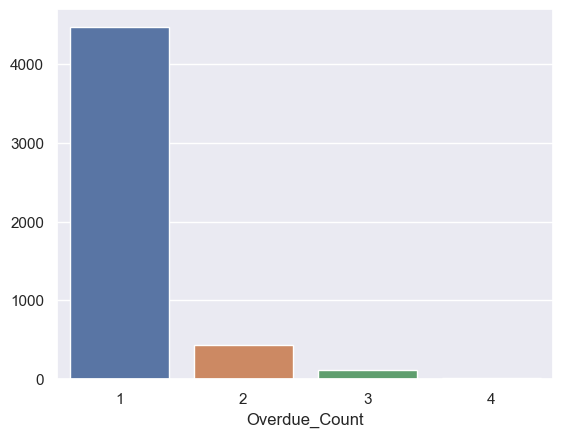

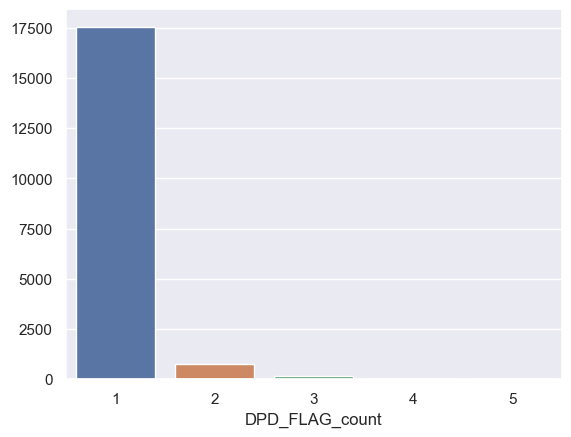

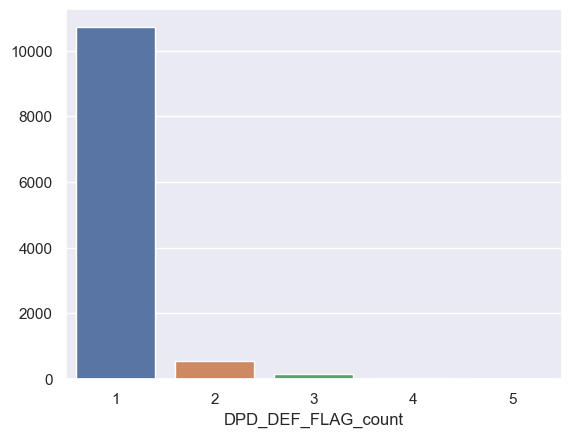

In [17]:
# Plot OVERDUE_COUNT
overdue_count_SK = POS_Cash_df_last.groupby(["Overdue_Count"]).size()[1:]
sns.barplot(x= overdue_count_SK.index , y= overdue_count_SK.values )
plt.show()

# Plot DPD_FLAG_COUNT
dpd_count_SK = POS_Cash_df_last.groupby(["DPD_FLAG_count"]).size()[1:]
sns.barplot(x= dpd_count_SK.index , y= dpd_count_SK.values )
plt.show()

# Plot DPD_DEF_FLAG_COUNT
dpd_def_count_SK = POS_Cash_df_last.groupby(["DPD_DEF_FLAG_count"]).size()[1:]
sns.barplot(x= dpd_def_count_SK.index , y= dpd_def_count_SK.values )
plt.show()

In [18]:
POS_Cash_df_last

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,CNT_INSTALMENT_DIFF,DPD,OVERDUE_RATIO,OVERDUE_DEF_RATIO,COMPLETED_COUNT,Overdue_Count,DPD_FLAG_count,DPD_DEF_FLAG_count
0,0,1231213,-1,12.00,12.00,Active,0,0,0.00,0,0.00,0.00,3,0,0,0
1,0,1716062,-5,2.00,0.00,Completed,0,0,2.00,0,0.00,0.00,3,0,0,0
2,0,1891354,-1,3.00,0.00,Completed,0,0,3.00,0,0.00,0.00,3,0,0,0
3,0,2665996,-10,5.00,0.00,Completed,0,0,5.00,0,0.00,0.00,3,0,0,0
4,1,1847729,-43,10.00,0.00,Completed,0,0,10.00,0,0.00,0.00,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800332,307508,1956312,-1,10.00,2.00,Active,0,0,8.00,0,0.00,0.00,2,0,0,0
800333,307508,1978855,-64,12.00,1.00,Active,0,0,11.00,0,0.00,0.00,2,0,0,0
800334,307509,1153961,-43,8.00,0.00,Completed,0,0,8.00,0,0.00,0.00,2,0,0,0
800335,307509,2384616,-25,6.00,0.00,Completed,0,0,6.00,0,0.00,0.00,2,0,0,0


In [20]:
# Load data bảng application_train để lấy biến TARGET
app_df = pd.read_csv('../raw-data/dseb63_application_train.csv')
app_df

# Merge pos_cash_df và app_df on SK_ID_CURR
POS_Cash_df_last = POS_Cash_df_last.merge(app_df[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='left')
POS_Cash_df_last

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,CNT_INSTALMENT_DIFF,DPD,OVERDUE_RATIO,OVERDUE_DEF_RATIO,COMPLETED_COUNT,Overdue_Count,DPD_FLAG_count,DPD_DEF_FLAG_count,TARGET
0,0,1231213,-1,12.00,12.00,Active,0,0,0.00,0,0.00,0.00,3,0,0,0,0.00
1,0,1716062,-5,2.00,0.00,Completed,0,0,2.00,0,0.00,0.00,3,0,0,0,0.00
2,0,1891354,-1,3.00,0.00,Completed,0,0,3.00,0,0.00,0.00,3,0,0,0,0.00
3,0,2665996,-10,5.00,0.00,Completed,0,0,5.00,0,0.00,0.00,3,0,0,0,0.00
4,1,1847729,-43,10.00,0.00,Completed,0,0,10.00,0,0.00,0.00,2,0,0,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800332,307508,1956312,-1,10.00,2.00,Active,0,0,8.00,0,0.00,0.00,2,0,0,0,NaN
800333,307508,1978855,-64,12.00,1.00,Active,0,0,11.00,0,0.00,0.00,2,0,0,0,NaN
800334,307509,1153961,-43,8.00,0.00,Completed,0,0,8.00,0,0.00,0.00,2,0,0,0,0.00
800335,307509,2384616,-25,6.00,0.00,Completed,0,0,6.00,0,0.00,0.00,2,0,0,0,0.00


In [21]:
# Drop các bản ghi có TARGET = NaN
POS_Cash_df_last.dropna(subset=['TARGET'], inplace=True)
POS_Cash_df_last

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,CNT_INSTALMENT_DIFF,DPD,OVERDUE_RATIO,OVERDUE_DEF_RATIO,COMPLETED_COUNT,Overdue_Count,DPD_FLAG_count,DPD_DEF_FLAG_count,TARGET
0,0,1231213,-1,12.00,12.00,Active,0,0,0.00,0,0.00,0.00,3,0,0,0,0.00
1,0,1716062,-5,2.00,0.00,Completed,0,0,2.00,0,0.00,0.00,3,0,0,0,0.00
2,0,1891354,-1,3.00,0.00,Completed,0,0,3.00,0,0.00,0.00,3,0,0,0,0.00
3,0,2665996,-10,5.00,0.00,Completed,0,0,5.00,0,0.00,0.00,3,0,0,0,0.00
4,1,1847729,-43,10.00,0.00,Completed,0,0,10.00,0,0.00,0.00,2,0,0,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800328,307506,2196293,-2,12.00,0.00,Completed,0,0,12.00,0,0.00,0.00,4,0,0,0,0.00
800329,307506,2693485,-14,12.00,0.00,Completed,0,0,12.00,0,0.00,0.00,4,0,0,0,0.00
800334,307509,1153961,-43,8.00,0.00,Completed,0,0,8.00,0,0.00,0.00,2,0,0,0,0.00
800335,307509,2384616,-25,6.00,0.00,Completed,0,0,6.00,0,0.00,0.00,2,0,0,0,0.00


In [22]:
POS_Cash_df_last['TARGET'].value_counts()

TARGET
0.00    593001
1.00     47183
Name: count, dtype: int64

In [23]:
cols_to_plot = POS_Cash_df_last[num_cols].var()[POS_Cash_df_last[num_cols].var() > 0.1].index.tolist()
cols_to_plot.remove('SK_ID_CURR')
cols_to_plot.remove('SK_ID_PREV')
print('Plotting {} columns: {}'.format(len(cols_to_plot), cols_to_plot))

ncol, nrow = 3, len(cols_to_plot) // 3 + 1

Plotting 9 columns: ['MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF', 'CNT_INSTALMENT_DIFF', 'DPD', 'OVERDUE_RATIO', 'OVERDUE_DEF_RATIO']


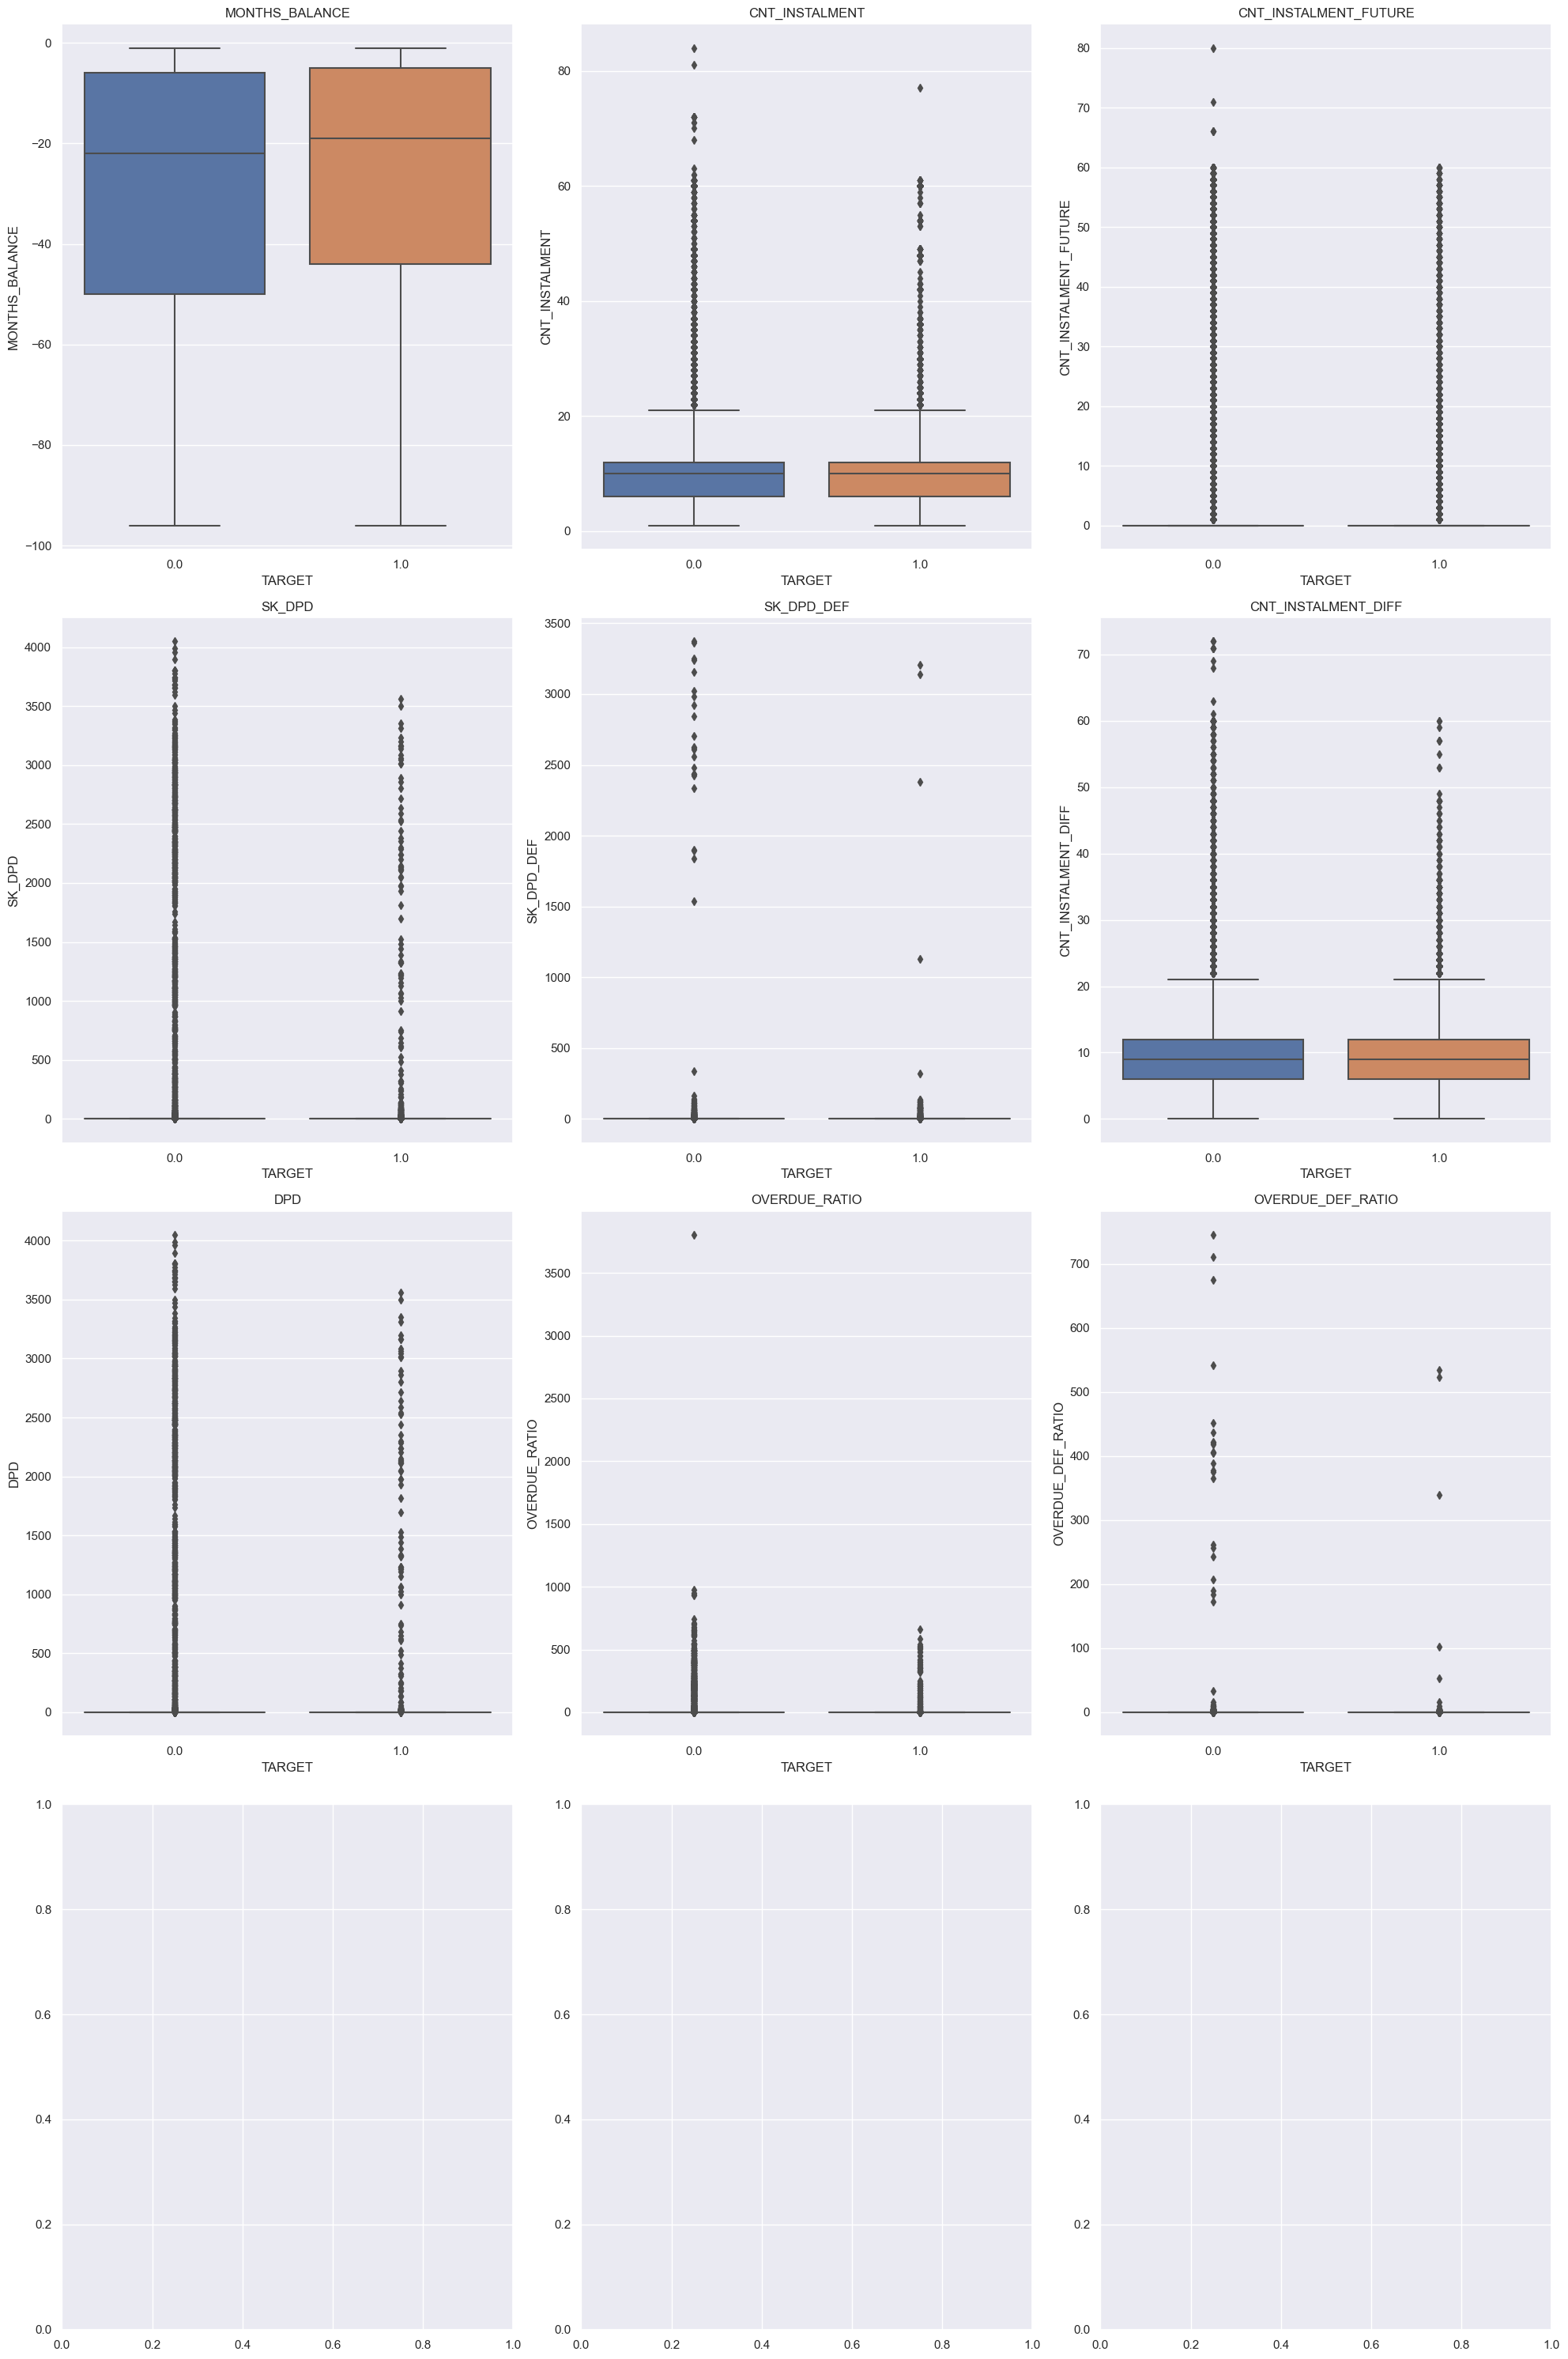

In [24]:
# Boxplot for numerical columns with hue = TARGET
fig, ax = plt.subplots(nrow, ncol, figsize=(20, 30))

for i, col in enumerate(cols_to_plot):
    sns.boxplot(x='TARGET', y=col, data=POS_Cash_df_last, ax=ax[i//ncol, i%ncol])
    ax[i//ncol, i%ncol].set_title(col)

plt.tight_layout()
plt.show()

In [25]:
# Process outliers by clipping
POS_Cash_df_last[cols_to_plot] = POS_Cash_df_last[cols_to_plot].clip(lower=POS_Cash_df_last[cols_to_plot].quantile(0.01), upper=POS_Cash_df_last[cols_to_plot].quantile(0.99), axis=1)
POS_Cash_df_last

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,CNT_INSTALMENT_DIFF,DPD,OVERDUE_RATIO,OVERDUE_DEF_RATIO,COMPLETED_COUNT,Overdue_Count,DPD_FLAG_count,DPD_DEF_FLAG_count,TARGET
0,0,1231213,-1,12.00,12.00,Active,0,0,1.00,0,0.00,0.00,3,0,0,0,0.00
1,0,1716062,-5,2.00,0.00,Completed,0,0,2.00,0,0.00,0.00,3,0,0,0,0.00
2,0,1891354,-1,3.00,0.00,Completed,0,0,3.00,0,0.00,0.00,3,0,0,0,0.00
3,0,2665996,-10,5.00,0.00,Completed,0,0,5.00,0,0.00,0.00,3,0,0,0,0.00
4,1,1847729,-43,10.00,0.00,Completed,0,0,10.00,0,0.00,0.00,2,0,0,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800328,307506,2196293,-2,12.00,0.00,Completed,0,0,12.00,0,0.00,0.00,4,0,0,0,0.00
800329,307506,2693485,-14,12.00,0.00,Completed,0,0,12.00,0,0.00,0.00,4,0,0,0,0.00
800334,307509,1153961,-43,8.00,0.00,Completed,0,0,8.00,0,0.00,0.00,2,0,0,0,0.00
800335,307509,2384616,-25,6.00,0.00,Completed,0,0,6.00,0,0.00,0.00,2,0,0,0,0.00


/var/folders/mp/v9hjfv017hbfgx9mc09nw2y80000gn/T/ipykernel_84173/518260172.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(POS_Cash_df_last.loc[POS_Cash_df_last['TARGET'] == 0, col], label='target 0', ax=ax[i//ncol, i%ncol])
/var/folders/mp/v9hjfv017hbfgx9mc09nw2y80000gn/T/ipykernel_84173/518260172.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(POS_Cash_df_last.loc[POS_Cash_df_last['TARGET'] == 1, col], label='target 1', ax=ax[i//ncol, i%ncol])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/mp/v9hjfv017hbfgx9mc09nw2y80000gn/T/ipykernel_84173/518260172.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(POS_Ca

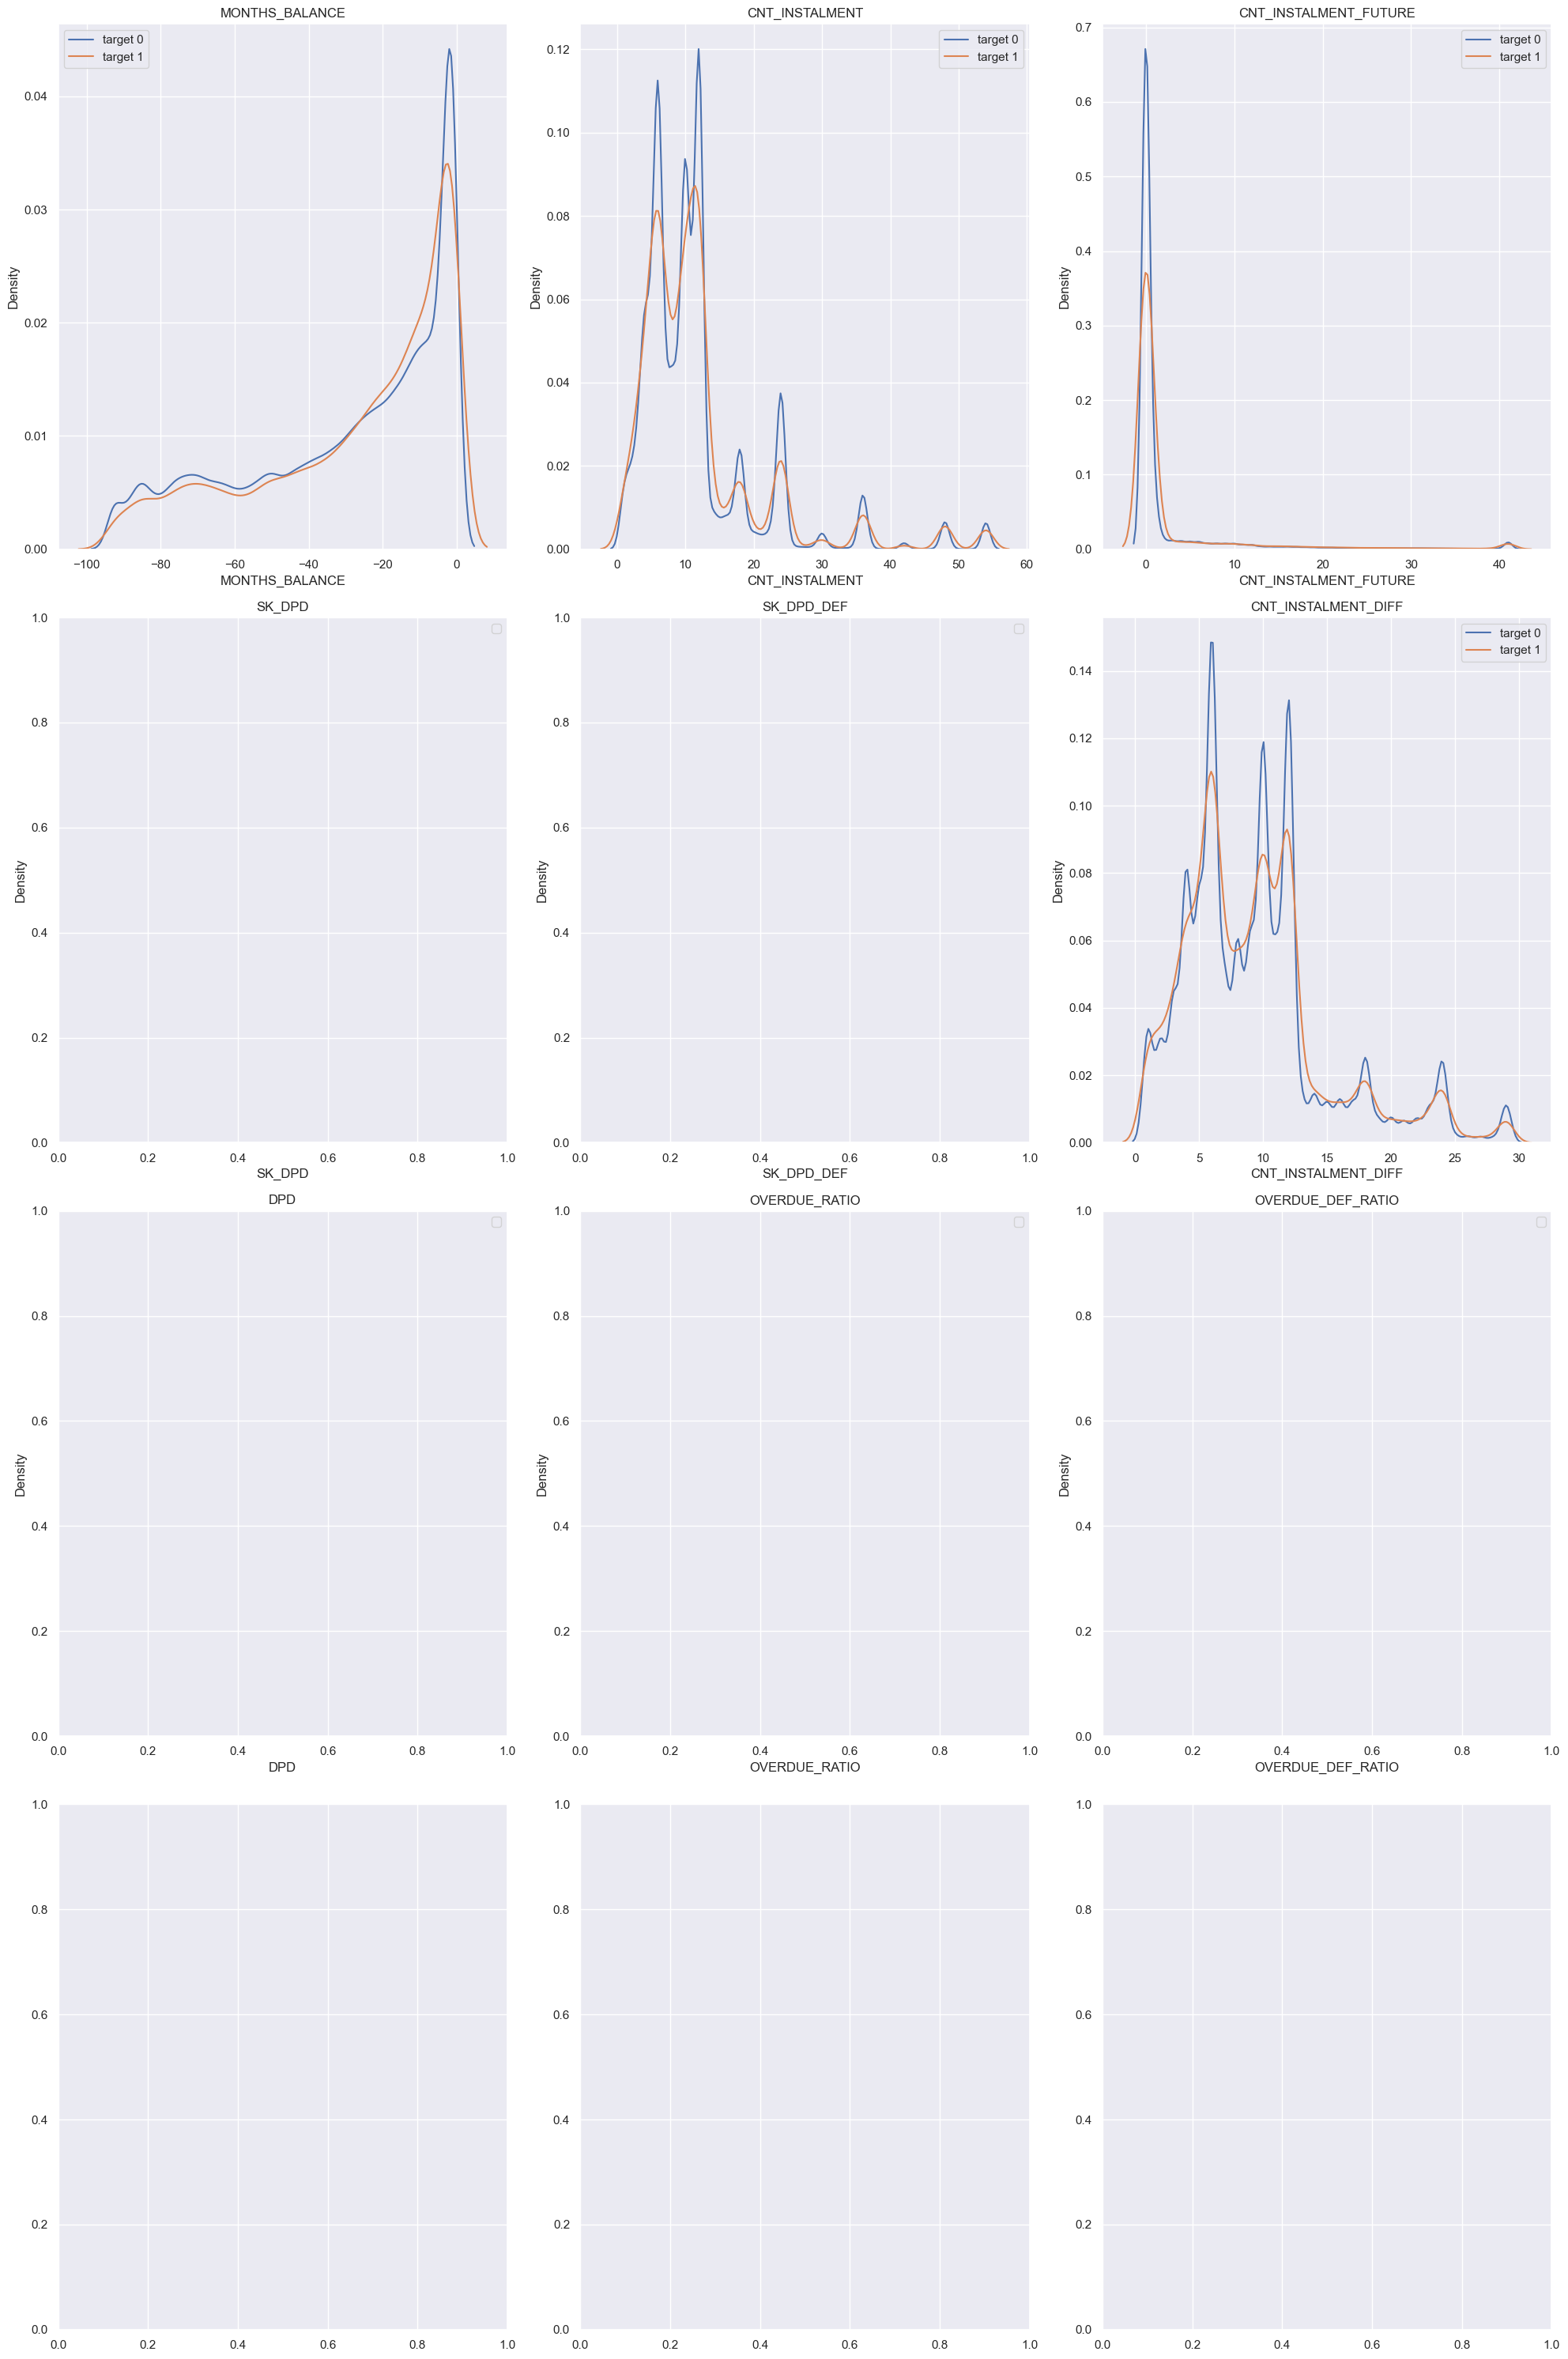

In [26]:
# Plot the distribution of the numerical features with hue = target
fig, ax = plt.subplots(nrow, ncol, figsize=(20, 30))

for i, col in enumerate(cols_to_plot):
    # kde plot
    sns.kdeplot(POS_Cash_df_last.loc[POS_Cash_df_last['TARGET'] == 0, col], label='target 0', ax=ax[i//ncol, i%ncol])
    sns.kdeplot(POS_Cash_df_last.loc[POS_Cash_df_last['TARGET'] == 1, col], label='target 1', ax=ax[i//ncol, i%ncol])
    ax[i//ncol, i%ncol].set_title(col)
    ax[i//ncol, i%ncol].legend()

plt.tight_layout()
plt.show()

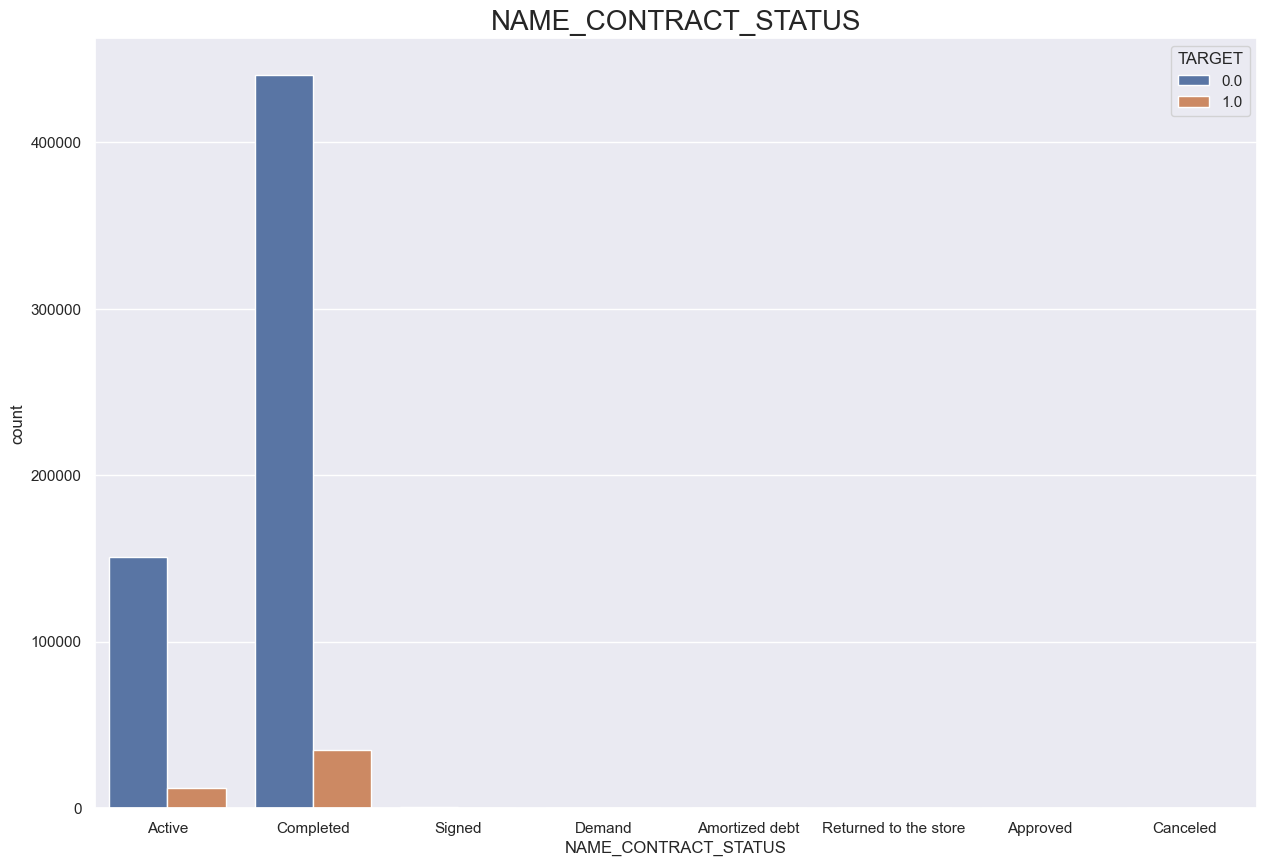

In [27]:
# Plot the distribution of the categorical features with hue = target

plt.figure(figsize=(15,10))
sns.countplot(x = POS_Cash_df_last['NAME_CONTRACT_STATUS'], hue = POS_Cash_df_last['TARGET'])
plt.title('NAME_CONTRACT_STATUS', fontsize=20)
plt.show()

In [28]:
POS_Cash_df_final = POS_Cash_df_last.groupby('SK_ID_CURR').first()[["COMPLETED_COUNT","Overdue_Count",'DPD_FLAG_count','DPD_DEF_FLAG_count']]
POS_Cash_df_final

,COMPLETED_COUNT,Overdue_Count,DPD_FLAG_count,DPD_DEF_FLAG_count
SK_ID_CURR,,,,
0,3,0,0,0
1,2,0,0,0
2,3,0,0,0
3,3,0,0,0
4,0,0,0,0
...,...,...,...,...
307504,2,0,0,0
307505,2,0,0,0
307506,4,0,0,0


In [29]:
agg_pos_df = POS_Cash_df.groupby('SK_ID_CURR')[['MONTHS_BALANCE','CNT_INSTALMENT','CNT_INSTALMENT_FUTURE','SK_DPD','SK_DPD_DEF','DPD','OVERDUE_RATIO','OVERDUE_DEF_RATIO']].agg(['min','max','mean','std'])
agg_pos_df

MONTHS_BALANCE                  CNT_INSTALMENT                    \
                      min max   mean   std            min   max  mean   std   
SK_ID_CURR                                                                    
0                     -15  -1  -7.47  4.81           2.00 12.00  8.13  3.76   
1                     -53 -12 -32.09 15.94          10.00 36.00 22.48 13.24   
2                     -82 -23 -55.15 21.82           4.00 12.00  8.59  3.02   
3                     -24  -5 -12.43  6.27           2.00 12.00  9.93  3.52   
4                     -79 -73 -76.00  2.16           6.00  6.00  6.00  0.00   
...                   ...  ..    ...   ...            ...   ...   ...   ...   
307505                -68 -40 -54.45 10.15           8.00 10.00  9.10  1.02   
307506                -82  -2 -27.74 24.33           6.00 12.00 10.98  2.28   
307508                -75  -1 -29.07 25.71          10.00 12.00 11.11  1.01   
307509                -51 -25 -38.69 10.03           6.00 12.00  9.12  3.01   
307510                -82 -72 -77.00  3.32          10.00 10.00 10.00  0.00   

           CNT_INSTALMENT_FUTURE        ...  DPD      OVERDUE_RATIO            \
                             min   max  ... mean  std           min  max mean   
SK_ID_CURR                              ...                                     
0                           0.00 12.00  ... 0.00 0.00          0.00 0.00 0.00   
1                           0.00 36.00  ... 1.26 4.18          0.00 0.42 0.04   
2                           0.00 12.00  ... 0.00 0.00          0.00 0.00 0.00   
3                           0.00 12.00  ... 0.00 0.00          0.00 0.00 0.00   
4                           0.00  6.00  ... 0.00 0.00          0.00 0.00 0.00   
...                          ...   ...  ...  ...  ...           ...  ...  ...   
307505                      0.00 10.00  ... 0.00 0.00          0.00 0.00 0.00   
307506                      0.00 12.00  ... 0.00 0.00          0.00 1.67 0.13   
307508                      0.00 12.00  ... 0.00 0.00          0.00 0.00 0.00   
307509                      0.00 12.00  ... 0.00 0.00          0.00 0.00 0.00   
307510                      0.00 10.00  ... 0.00 0.00          0.00 0.00 0.00   

                OVERDUE_DEF_RATIO                 
            std               min  max mean  std  
SK_ID_CURR                                        
0          0.00              0.00 0.00 0.00 0.00  
1          0.12              0.00 0.00 0.00 0.00  
2          0.00              0.00 0.00 0.00 0.00  
3          0.00              0.00 0.00 0.00 0.00  
4          0.00              0.00 0.00 0.00 0.00  
...         ...               ...  ...  ...  ...  
307505     0.00              0.00 0.00 0.00 0.00  
307506     0.45              0.00 1.67 0.13 0.45  
307508     0.00              0.00 0.00 0.00 0.00  
307509     0.00              0.00 0.00 0.00 0.00  
307510     0.00              0.00 0.00 0.00 0.00  

[289444 rows x 32 columns]

In [30]:
agg_pos_df.columns = [c[0] + "_" + c[1].upper() for c in agg_pos_df.columns.values.tolist()]
agg_pos_df

,MONTHS_BALANCE_MIN,MONTHS_BALANCE_MAX,MONTHS_BALANCE_MEAN,MONTHS_BALANCE_STD,CNT_INSTALMENT_MIN,CNT_INSTALMENT_MAX,CNT_INSTALMENT_MEAN,CNT_INSTALMENT_STD,CNT_INSTALMENT_FUTURE_MIN,CNT_INSTALMENT_FUTURE_MAX,...,DPD_MEAN,DPD_STD,OVERDUE_RATIO_MIN,OVERDUE_RATIO_MAX,OVERDUE_RATIO_MEAN,OVERDUE_RATIO_STD,OVERDUE_DEF_RATIO_MIN,OVERDUE_DEF_RATIO_MAX,OVERDUE_DEF_RATIO_MEAN,OVERDUE_DEF_RATIO_STD
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
0,-15,-1,-7.47,4.81,2.00,12.00,8.13,3.76,0.00,12.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,-53,-12,-32.09,15.94,10.00,36.00,22.48,13.24,0.00,36.00,...,1.26,4.18,0.00,0.42,0.04,0.12,0.00,0.00,0.00,0.00
2,-82,-23,-55.15,21.82,4.00,12.00,8.59,3.02,0.00,12.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,-24,-5,-12.43,6.27,2.00,12.00,9.93,3.52,0.00,12.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,-79,-73,-76.00,2.16,6.00,6.00,6.00,0.00,0.00,6.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307505,-68,-40,-54.45,10.15,8.00,10.00,9.10,1.02,0.00,10.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
307506,-82,-2,-27.74,24.33,6.00,12.00,10.98,2.28,0.00,12.00,...,0.00,0.00,0.00,1.67,0.13,0.45,0.00,1.67,0.13,0.45
307508,-75,-1,-29.07,25.71,10.00,12.00,11.11,1.01,0.00,12.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [31]:
agg_pos_df.fillna(0,inplace=True)
agg_pos_df.reset_index(inplace=True)

In [32]:
POS_Cash_df_final = POS_Cash_df_final.merge(agg_pos_df, how= "left", on= "SK_ID_CURR")
POS_Cash_df_final

,SK_ID_CURR,COMPLETED_COUNT,Overdue_Count,DPD_FLAG_count,DPD_DEF_FLAG_count,MONTHS_BALANCE_MIN,MONTHS_BALANCE_MAX,MONTHS_BALANCE_MEAN,MONTHS_BALANCE_STD,CNT_INSTALMENT_MIN,...,DPD_MEAN,DPD_STD,OVERDUE_RATIO_MIN,OVERDUE_RATIO_MAX,OVERDUE_RATIO_MEAN,OVERDUE_RATIO_STD,OVERDUE_DEF_RATIO_MIN,OVERDUE_DEF_RATIO_MAX,OVERDUE_DEF_RATIO_MEAN,OVERDUE_DEF_RATIO_STD
0,0,3,0,0,0,-15,-1,-7.47,4.81,2.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1,2,0,0,0,-53,-12,-32.09,15.94,10.00,...,1.26,4.18,0.00,0.42,0.04,0.12,0.00,0.00,0.00,0.00
2,2,3,0,0,0,-82,-23,-55.15,21.82,4.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,3,3,0,0,0,-24,-5,-12.43,6.27,2.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,4,0,0,0,0,-79,-73,-76.00,2.16,6.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231526,307504,2,0,0,0,-96,-1,-59.62,39.96,6.00,...,0.00,0.00,0.00,4.67,0.36,1.29,0.00,4.67,0.36,1.29
231527,307505,2,0,0,0,-68,-40,-54.45,10.15,8.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
231528,307506,4,0,0,0,-82,-2,-27.74,24.33,6.00,...,0.00,0.00,0.00,1.67,0.13,0.45,0.00,1.67,0.13,0.45
231529,307509,2,0,0,0,-51,-25,-38.69,10.03,6.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
